In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from engine import Engine
from map import Map
from simulation import Simulation
from car import Car


In [12]:
class Statistics:
    def mean_v(self, v_map, cars_number):
        mask = (v_map >= 0)
        return np.sum(v_map[mask]) / cars_number

    def cars_stop_ratio(self, v_map, cars_number):
        # mask = (v_map == 0)
        # return np.sum(v_map[mask]) / car_number
        return (np.count_nonzero(v_map == 0) / cars_number) * 100

    def cars_move_ratio(self, v_map, cars_number):
        # mask = (v_map > 0)
        # return np.sum(v_map[mask]) / car_number
        return (np.count_nonzero(v_map > 0) / cars_number) * 100

    def min_value(self, vector):
        return min(vector)

    def max_value(self, vector):
        return max(vector)

    def mean_value(self, vector):
        return np.mean(vector)

    def standard_deviation(self, vector):
        return np.std(vector)

    def average_section_travel_time(self, cars, distance, cars_number, ticks_number):
        # cars = engine.simulation.cars
        cum_distance = 0
        for car in cars:
            cum_distance += car.odometer

        #the average number of times a given distance has been driven by all cars
        average_distance_driven_time = ((cum_distance/cars_number)/distance)

        # the average travel time for a given length section
        average_section_travel_time = ticks_number / average_distance_driven_time

        return average_section_travel_time

    def average_speed_plot(self, mean_vs, cars_number):
        mean_value = self.mean_value(mean_vs)
        plt.plot(mean_vs, label='mean velocity')
        plt.axhline(mean_value, color='red', linestyle='--', label='mean')
        plt.xlabel('tick')
        plt.ylabel('velocity')
        plt.legend()
        plt.title(f"Average speed ({cars_number} cars)")
        # plt.show()

    def average_speed_box_plot(self, mean_vs, cars_number):
        plt.boxplot(mean_vs)
        plt.ylabel('velocity')
        plt.title(f'Average velocity boxplot ({cars_number} cars)')
        # plt.show()

    def stop_moving_cars_plot(self, stop_cars, moving_cars, cars_number, ticks_number):
        red = '#ff1c1c'
        green = '#5aff00'
        blue = '#1c00ac'
        x = [i for i in range(1, ticks_number + 1)]
        y1 = stop_cars
        y2 = moving_cars
        mean_value_stop = self.mean_value(stop_cars)
        mean_value_moving = self.mean_value(moving_cars)

        where_greater = np.array(y2) > np.array(y1)
        where_less = np.array(y2) < np.array(y1)

        plt.plot(x, y1, label='stop cars ratio', color=red)
        plt.plot(x, y2, label='moving cars ratio', color=green)
        plt.axhline(mean_value_stop, color=blue, linestyle='--', label='mean stop')
        plt.axhline(mean_value_moving, color=blue, linestyle='-.', label='mean moving')
        plt.fill_between(x, y1, y2, where=where_greater, color='green', alpha=0.3)
        plt.fill_between(x, y1, y2, where=where_less, color='red', alpha=0.3)
        plt.xlabel('tick')
        plt.ylabel('% of cars')
        plt.legend()
        plt.title(f"Stop/Moving cars ratio ({cars_number} cars)")
        # plt.show()

    def stop_cars_box_plot(self, stop_cars_ratios, cars_number):
        plt.boxplot(stop_cars_ratios)
        plt.ylabel('velocity')
        plt.title(f'Stop cars ratio boxplot ({cars_number} cars)')
        # plt.show()

    def moving_cars_box_plot(self, moving_cars_ratios, cars_number):
        plt.boxplot(moving_cars_ratios)
        plt.ylabel('velocity')
        plt.title(f'Moving cars ratio boxplot ({cars_number} cars)')
        # plt.show()

    def heat_map(self, heatmap_matrix, cars_number):
        ax = sns.heatmap(heatmap_matrix, cbar=False)
        ax.set_title(f'Heatmap ({cars_number} cars)')
        # plt.show()

    def travel_time_plot(self, categories, values, distance):
        plt.bar(categories, values)
        plt.ylabel('ticks')
        plt.title(f'Time to travel {distance} tiles')
        # plt.show()

    def generate_average_speed_plots(self, mean_vs_lists, cars_numbers):
        num_rows = 4
        num_cols = 2
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20), gridspec_kw={'width_ratios': [2, 1]})

        counter = 0
        for i in range(num_rows):
            for j in range(num_cols):
                ax = axes[i, j]  # Wybór odpowiedniej osi
                plt.sca(ax)  # Ustawienie bieżącej osi
                if j == 0:
                    self.average_speed_plot(mean_vs_lists[counter], cars_numbers[counter])
                if j == 1:
                    self.average_speed_box_plot(mean_vs_lists[counter], cars_numbers[counter])
            counter += 1

        plt.tight_layout()
        # plt.savefig('test_fig.png')
        plt.show()

    def generate_stop_moving_cars_plots(self, stop_cars_lists, moving_cars_list, cars_numbers, ticks_number):
        num_rows = 4
        num_cols = 3
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 20), gridspec_kw={'width_ratios': [3, 1, 1]})

        counter = 0
        for i in range(num_rows):
            for j in range(num_cols):
                ax = axes[i, j]  # Wybór odpowiedniej osi
                plt.sca(ax)  # Ustawienie bieżącej osi
                if j == 0:
                    self.stop_moving_cars_plot(stop_cars_lists[counter], moving_cars_list[counter], cars_numbers[counter], ticks_number)
                if j == 1:
                    self.stop_cars_box_plot(stop_cars_lists[counter],cars_numbers[counter])
                if j == 2:
                    self.moving_cars_box_plot(moving_cars_list[counter],cars_numbers[counter])
            counter += 1

        plt.tight_layout()
        # plt.savefig('test_fig.png')
        plt.show()

    def generate_heatmaps(self, hitmap_list, cars_numbers):
        num_rows = 2
        num_cols = 2
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

        counter = 0
        for i in range(num_rows):
            for j in range(num_cols):
                ax = axes[i, j]  # Wybór odpowiedniej osi
                plt.sca(ax)  # Ustawienie bieżącej osi
                self.heat_map(hitmap_list[counter], cars_numbers[counter])
                counter += 1

        plt.tight_layout()
        # plt.savefig('test_fig.png')
        plt.show()

    def generate_travel_time_plots(self, average_section_travel_time_lists ,cars_numbers, distances):
        categories = [f'{number} cars' for number in cars_numbers ]

        num_rows = 2
        num_cols = 2
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))

        counter = 0
        for i in range(num_rows):
            for j in range(num_cols):
                values = [sublist[counter] for sublist in average_section_travel_time_lists]

                ax = axes[i, j]  # Wybór odpowiedniej osi
                plt.sca(ax)  # Ustawienie bieżącej osi
                self.travel_time_plot(categories, values, distances[counter])
                counter += 1

        plt.tight_layout()
        # plt.savefig('test_fig.png')
        plt.show()

In [13]:
s = Statistics()

# Research description

Max possible cars on map is 1128. At this number there is no free space on roads so cars can't drive. To simulate different traffic volumes four classes (number of cars on the map) will be created:
* 112 -> 10%,
* 282 -> 25%,
* 564 -> 50%,
* 846 -> 75%

It can be interpreted as different time of the day, for example: nighttime, morning-time or afternoon rush hour.
To measure how different scenarios is affects traffic, the following data will be collected during the simulation:
* average speed of all cars
* percentage of cars that are standing
* percentage of cars that are going
* average travel time for a specified distance
* średni czas oczekiwania na skrzyżowaniu???

The fallowing tests will be carried out:
* simulating different traffic volumes and their impact on traffic
* simulating traffic with and without traffic lights
* simulating different traffic light times and their impact on traffic
* simulating different max speed in their impact on the traffic

In [4]:
# TICKS = 500
# V_MAX = 6
# CARS_NUMBER = 200
# map = Map(100)
# simulation = Simulation(v_max=V_MAX, map=map, cars_number=CARS_NUMBER, time=1)
# engine = Engine(simulation, map)
#
# mean_vs = []
# stop_cars_number = []
# heat_map = engine.map.car_v_map
# for i in range(TICKS):
#     engine.loop(time=1) # no need time here
#     mean_vs.append(s.mean_v(engine.map.car_v_map, CARS_NUMBER))
#     stop_cars_number.append(s.cars_stop_ratio(engine.map.car_v_map, CARS_NUMBER))
#     heat_map += engine.map.car_v_map


# Simulating different scenarios (traffic volumes)

In [5]:
cars_numbers = [112, 282, 564, 846]
distances = [25, 50, 100, 150]
mean_vs_lists = []
stop_cars_lists = []
moving_cars_list = []
heat_map_lists = []
average_section_travel_time_lists = []


# loop through different scenarios (cars number on map)
for cars_number in cars_numbers:
    TICKS = 500
    V_MAX = 6
    CARS_NUMBER = cars_number

    map = Map(100)
    simulation = Simulation(v_max=V_MAX, map=map, cars_number=CARS_NUMBER, lights=False, lights_time=None, time=1)
    engine = Engine(simulation, map)

    mean_vs = []
    stop_cars = []
    moving_cars = []
    heat_map = engine.map.car_v_map
    times = []
    #loop simulation number of ticks
    for i in range(TICKS):
        engine.loop(time=1) # no need time here
        mean_vs.append(s.mean_v(engine.map.car_v_map, CARS_NUMBER))
        stop_cars.append(s.cars_stop_ratio(engine.map.car_v_map, CARS_NUMBER))
        moving_cars.append((s.cars_move_ratio(engine.map.car_v_map, CARS_NUMBER)))
        heat_map += engine.map.car_v_map

    #calculation of travel times
    for distance in distances:
        time = s.average_section_travel_time(engine.simulation.cars, distance, CARS_NUMBER, TICKS)
        times.append(time)

    #updating lists (need for visualizations)
    mean_vs_lists.append(mean_vs)
    stop_cars_lists.append(stop_cars)
    moving_cars_list.append(moving_cars)
    heat_map_lists.append(heat_map)
    average_section_travel_time_lists.append(times)

## Average speed

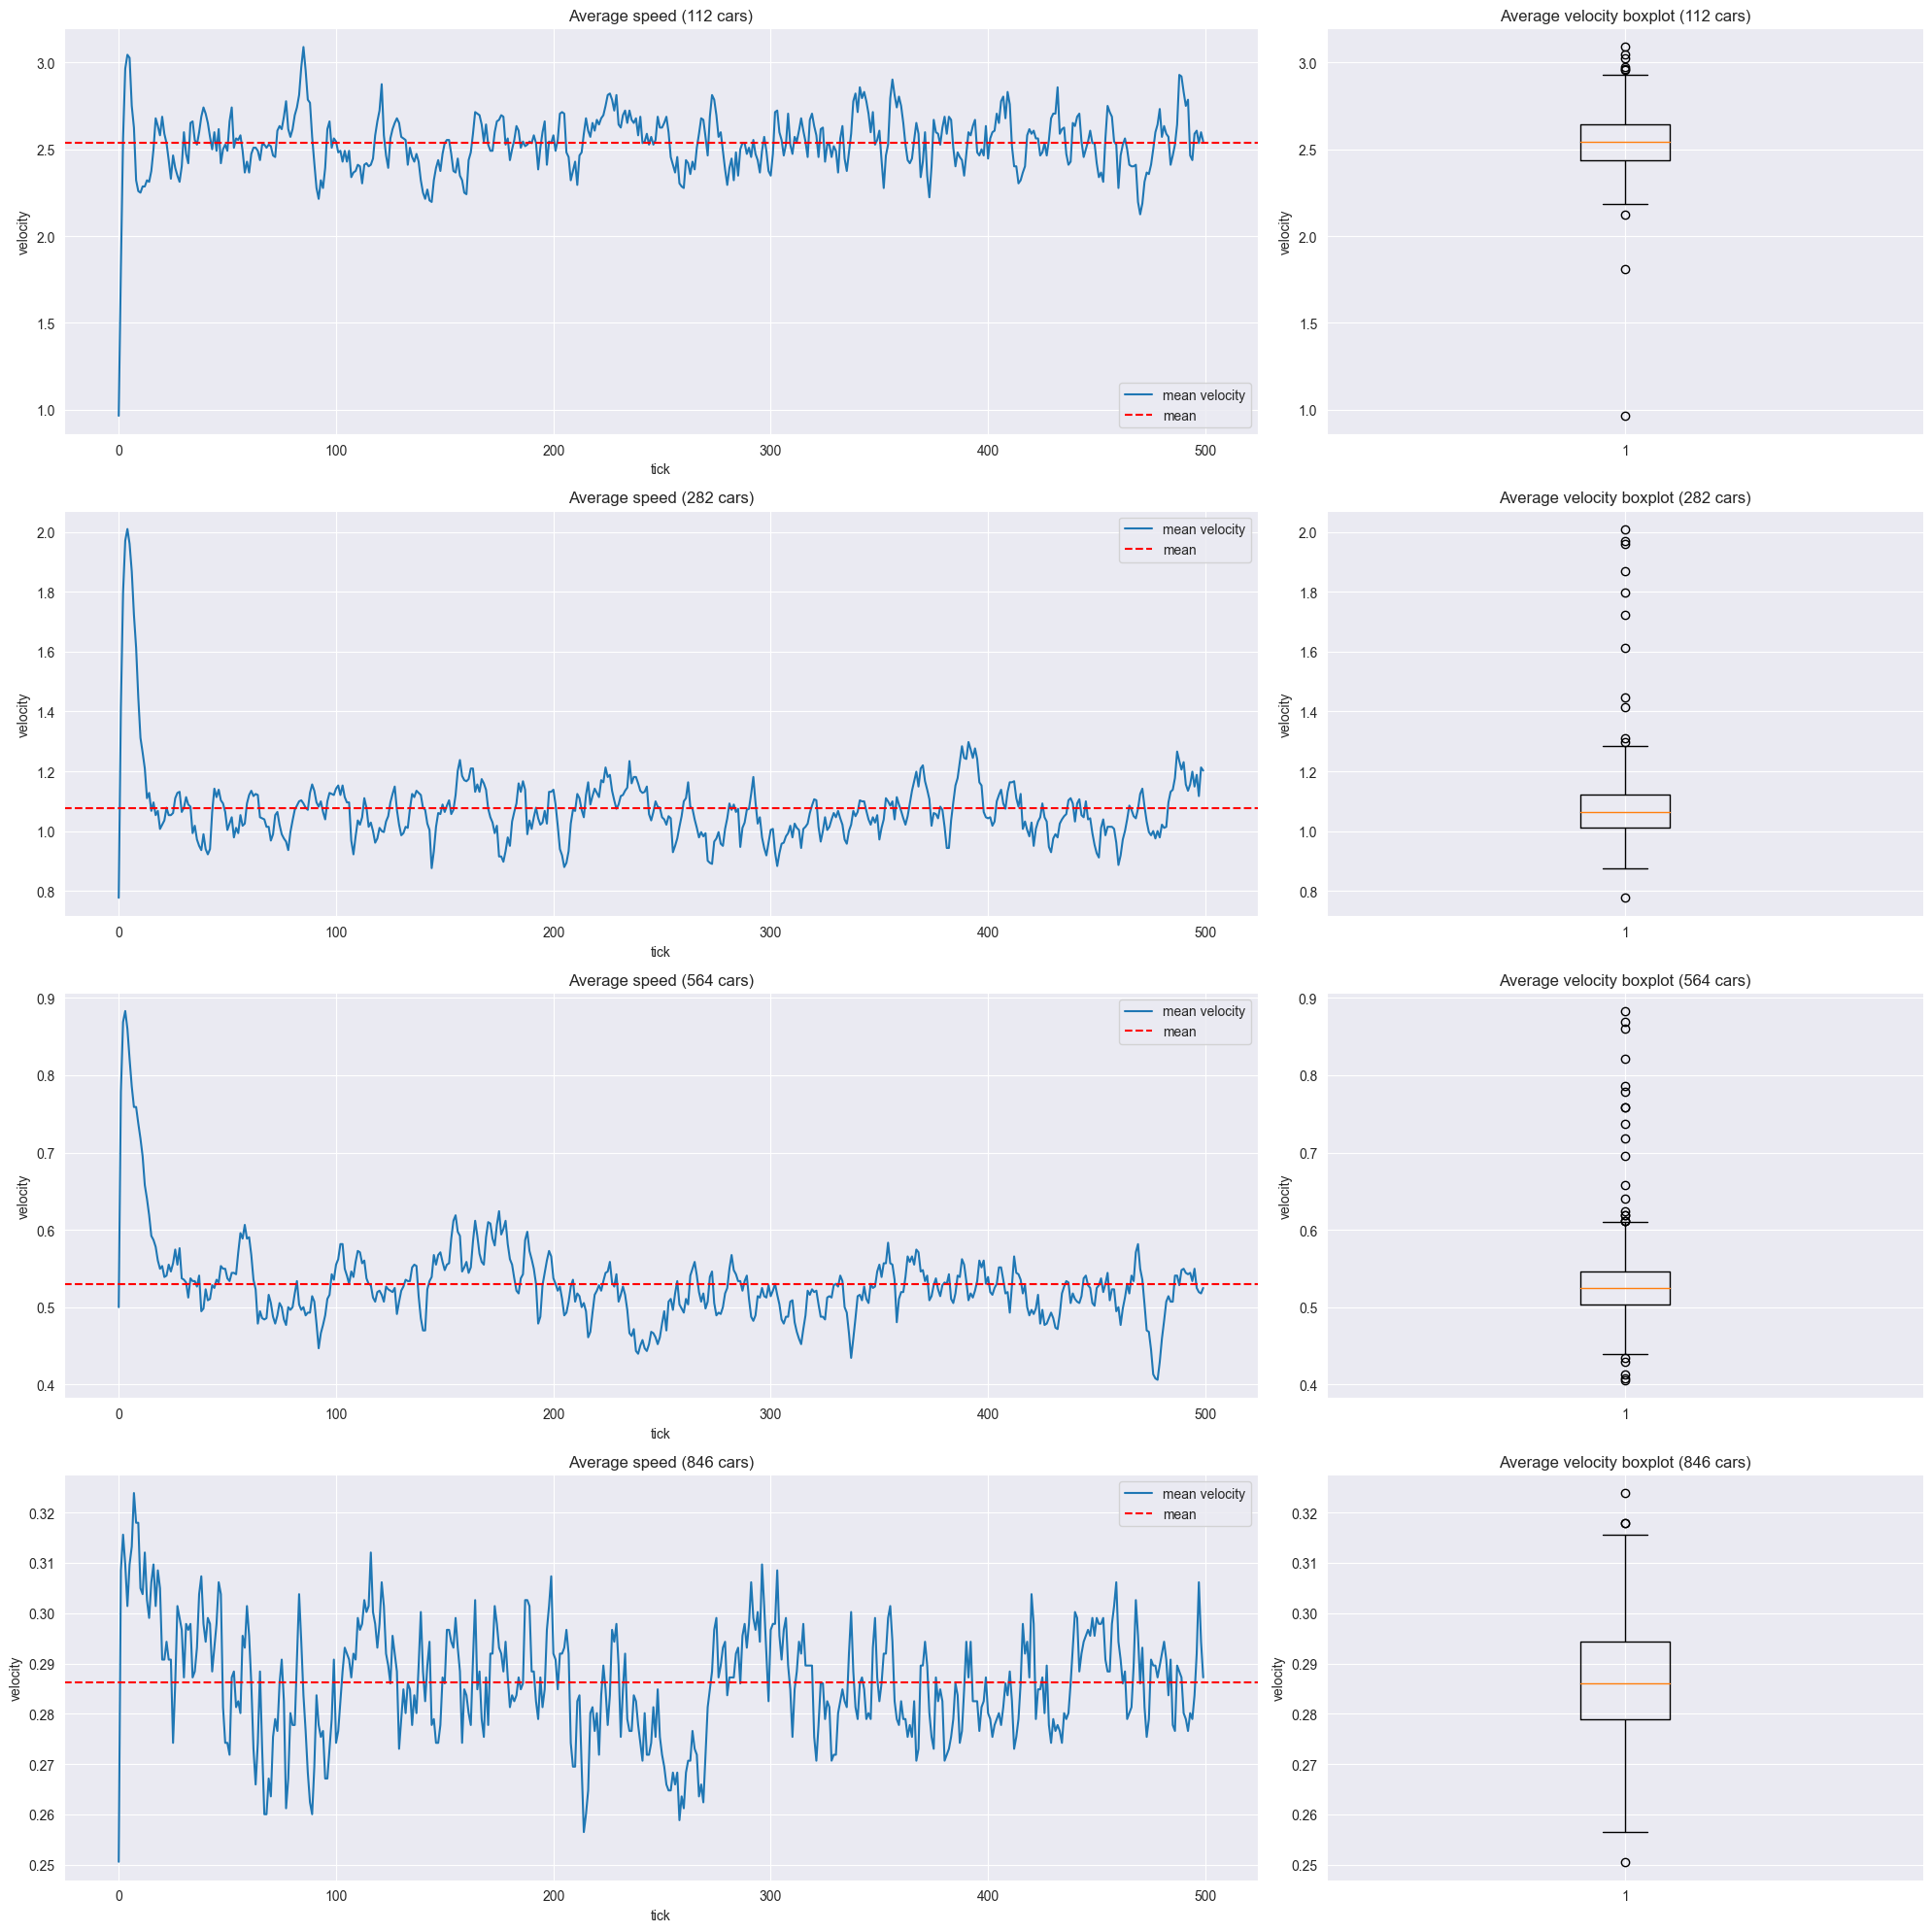

In [6]:
s.generate_average_speed_plots(mean_vs_lists, cars_numbers)

## Stop/moving cars ratio

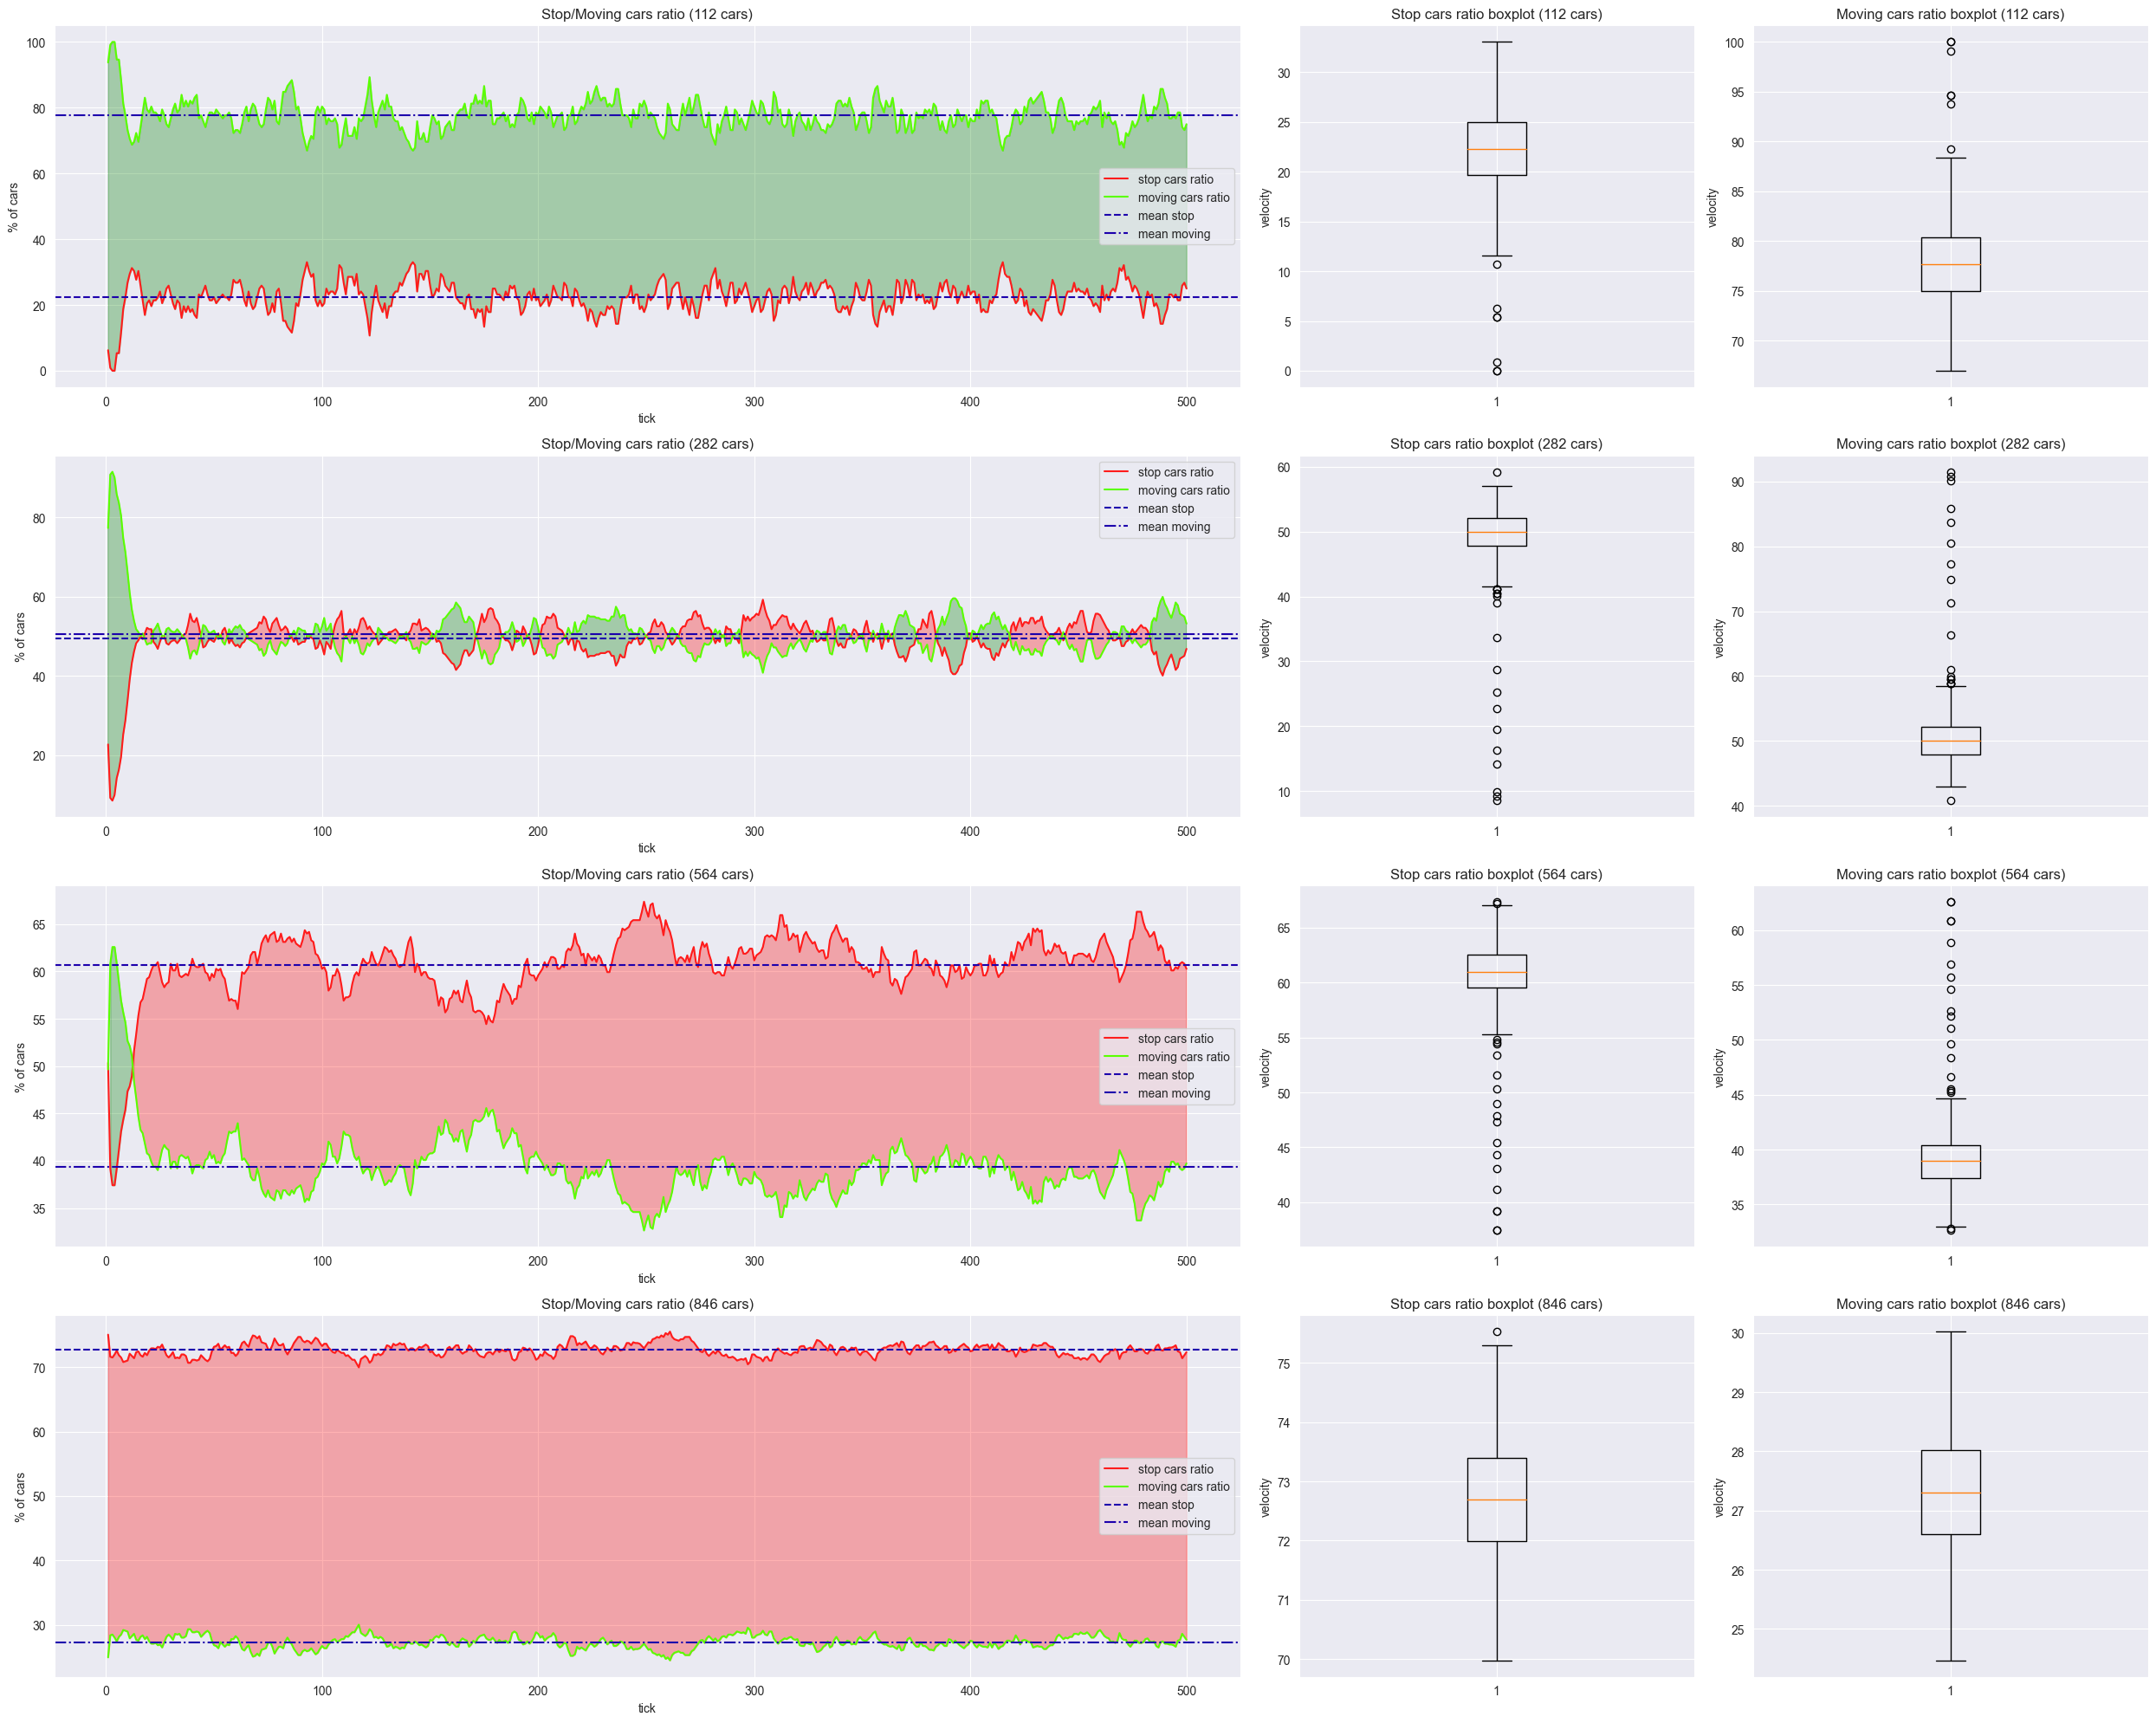

In [7]:
s.generate_stop_moving_cars_plots(stop_cars_lists, moving_cars_list, cars_numbers, TICKS)

## Heatmap

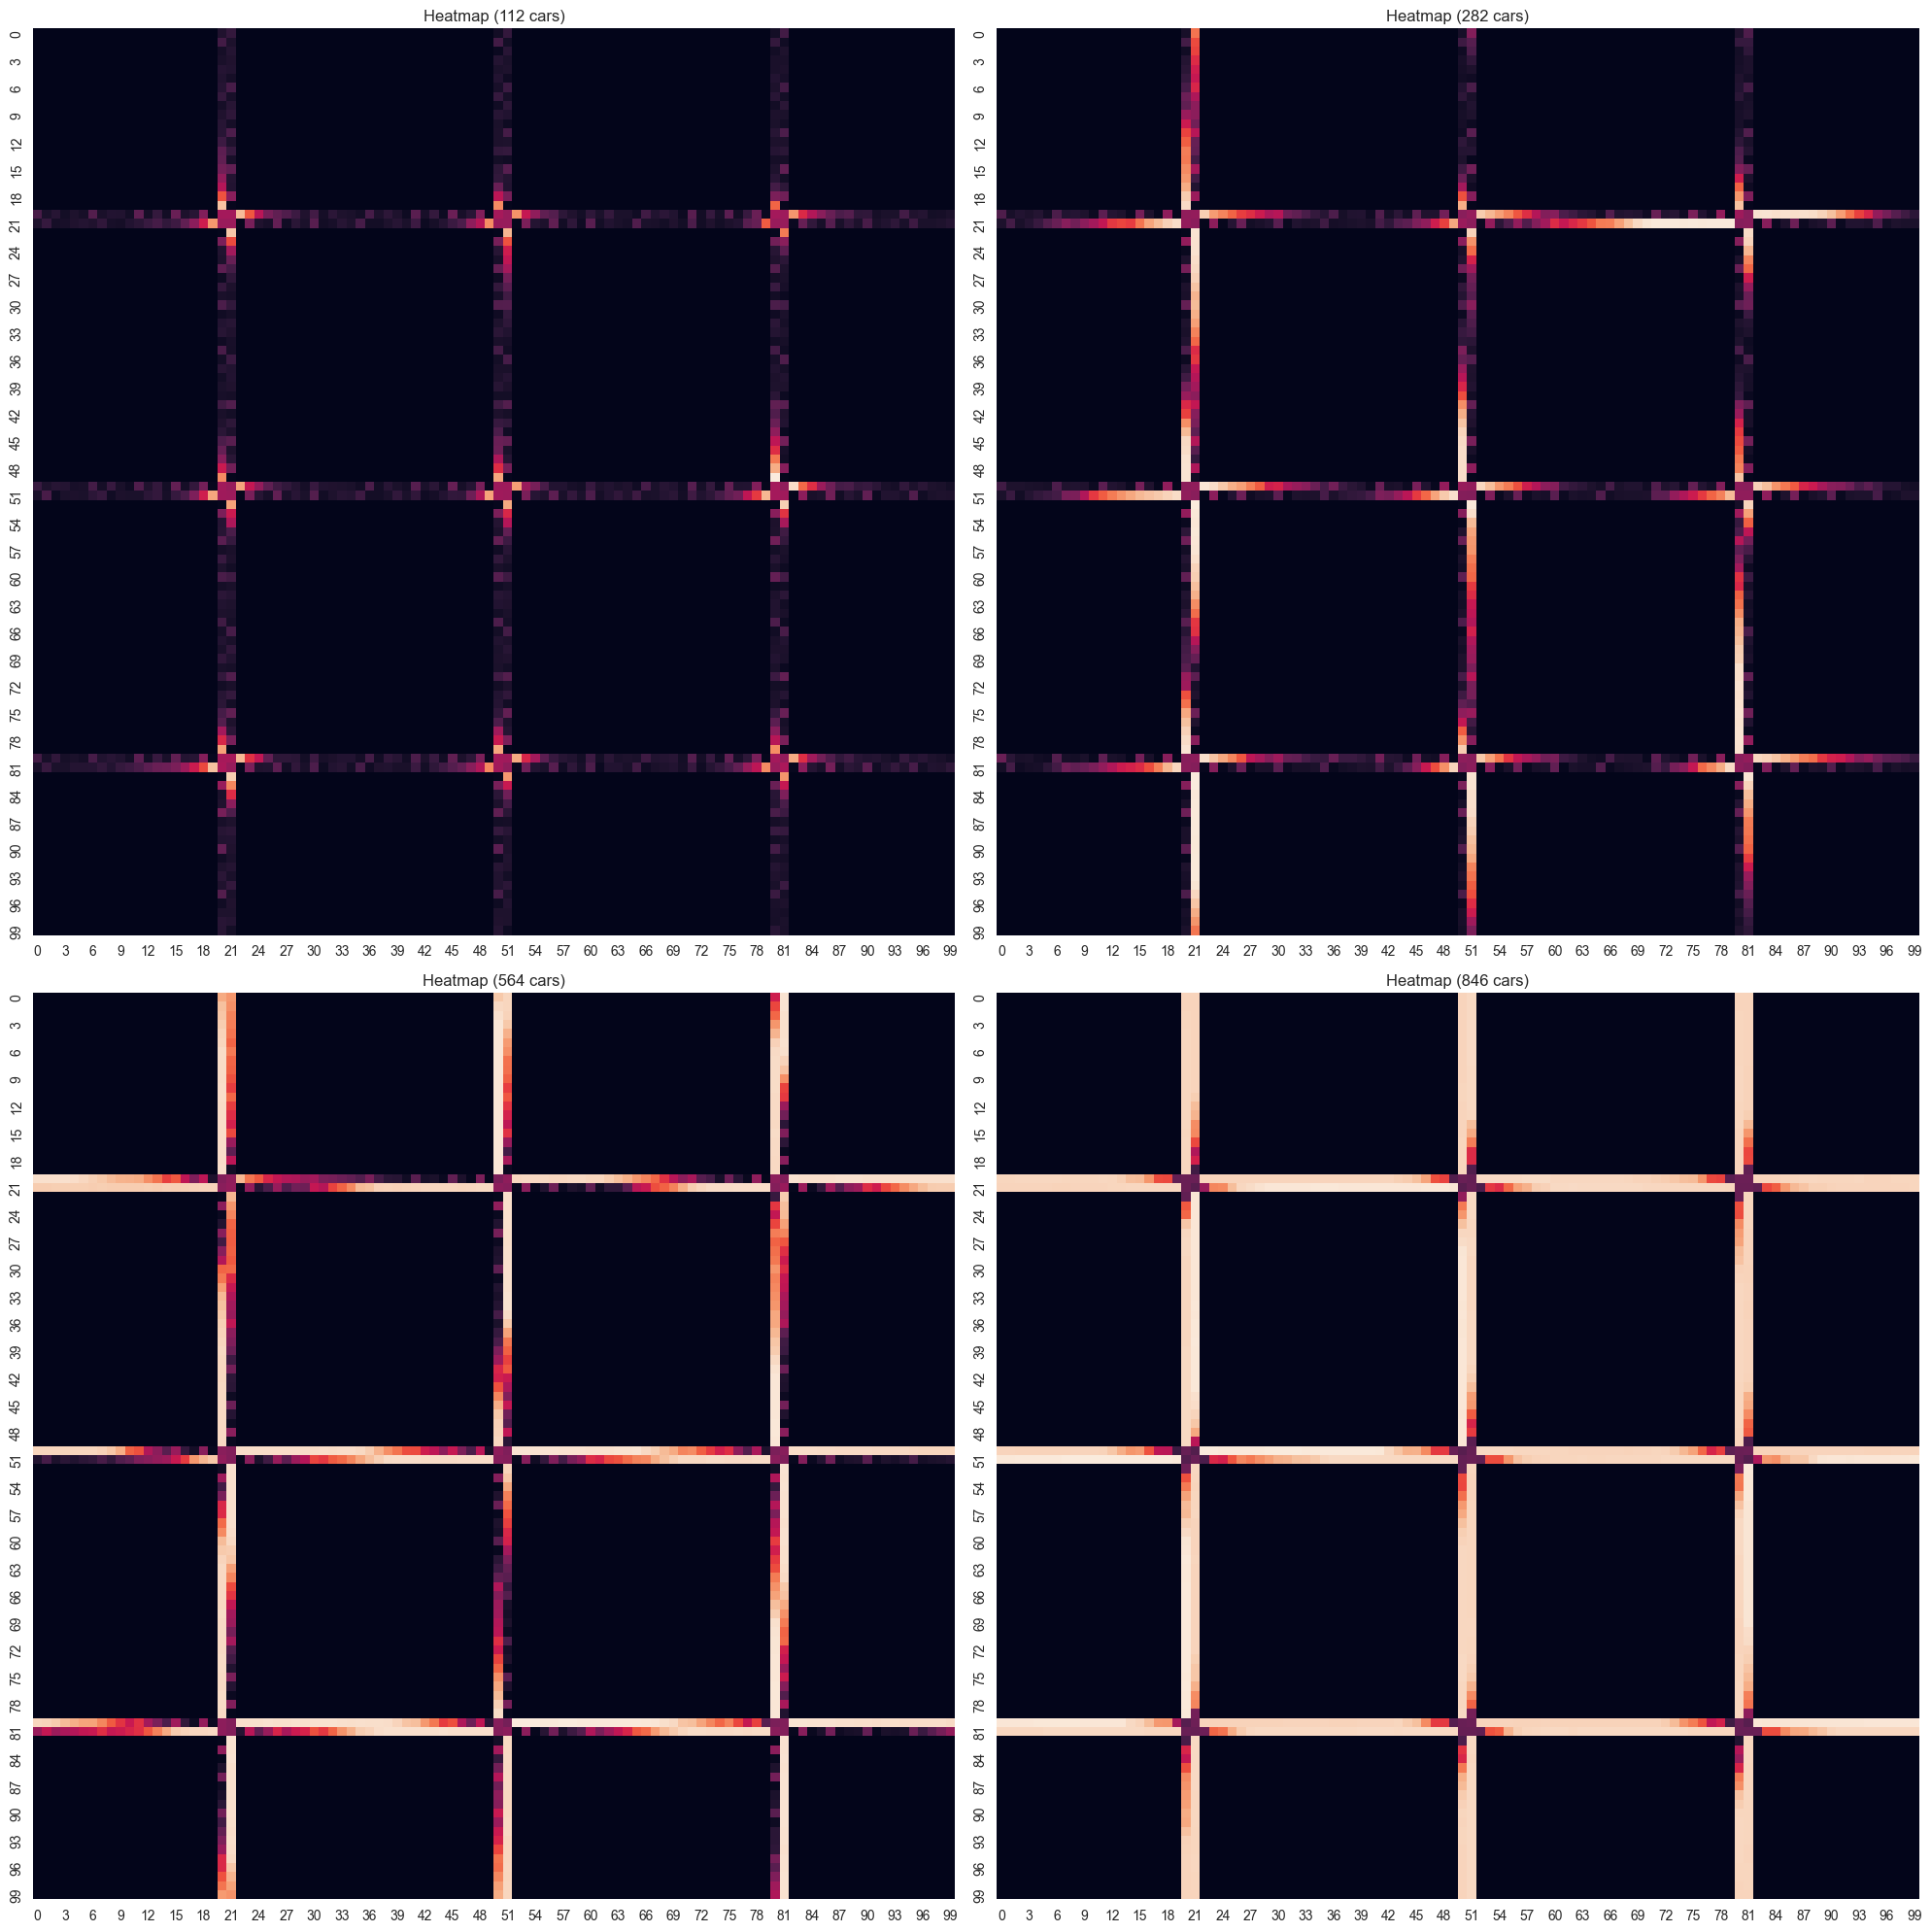

In [8]:
s.generate_heatmaps(heat_map_lists, cars_numbers)

## Average time to travel specified distances

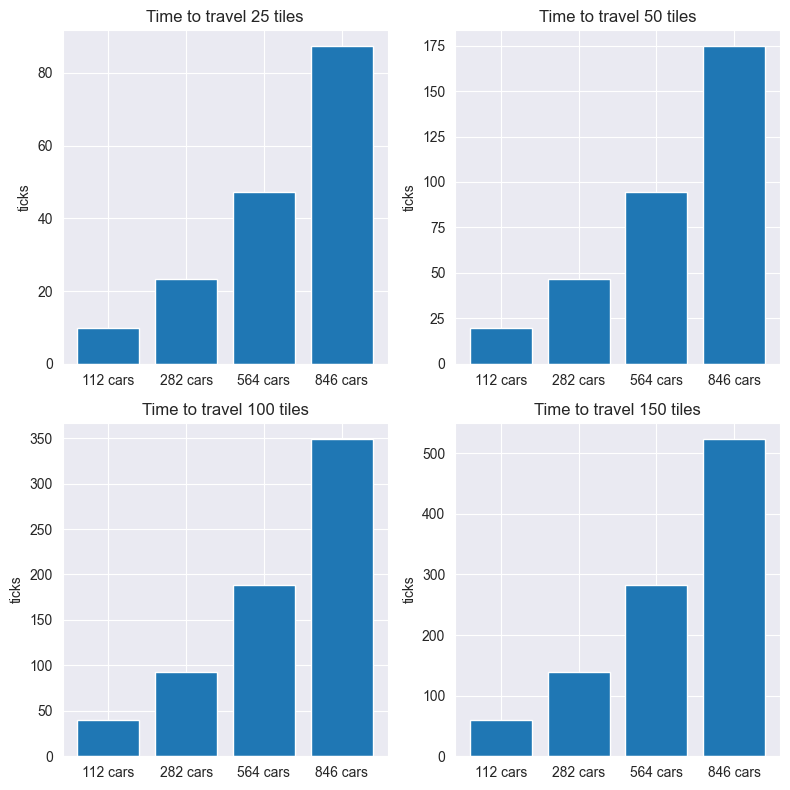

In [9]:
s.generate_travel_time_plots(average_section_travel_time_lists, cars_numbers, distances)

# Simulating different scenarios (lights times)

In [16]:
cars_numbers = [112, 282, 564, 846]
distances = [25, 50, 100, 150]
mean_vs_lists = []
stop_cars_lists = []
moving_cars_list = []
heat_map_lists = []
average_section_travel_time_lists = []
lights_times = [5, 10, 15]
TICKS = 500
V_MAX = 6


# loop through different scenarios (cars number on map)
for lights_time in lights_times:
    for cars_number in cars_numbers:
        CARS_NUMBER = cars_number
        map = Map(100)
        simulation = Simulation(v_max=V_MAX, map=map, cars_number=CARS_NUMBER, lights=True, lights_time=lights_time, time=1)
        engine = Engine(simulation, map)

        mean_vs = []
        stop_cars = []
        moving_cars = []
        heat_map = engine.map.car_v_map
        times = []
        #loop simulation number of ticks
        for i in range(TICKS):
            engine.loop(time=1) # no need time here
            mean_vs.append(s.mean_v(engine.map.car_v_map, CARS_NUMBER))
            stop_cars.append(s.cars_stop_ratio(engine.map.car_v_map, CARS_NUMBER))
            moving_cars.append((s.cars_move_ratio(engine.map.car_v_map, CARS_NUMBER)))
            heat_map += engine.map.car_v_map

        #calculation of travel times
        for distance in distances:
            time = s.average_section_travel_time(engine.simulation.cars, distance, CARS_NUMBER, TICKS)
            times.append(time)

        #updating lists (need for visualizations)
        mean_vs_lists.append(mean_vs)
        stop_cars_lists.append(stop_cars)
        moving_cars_list.append(moving_cars)
        heat_map_lists.append(heat_map)
        average_section_travel_time_lists.append(times)

## Average speed (lights time = 5)

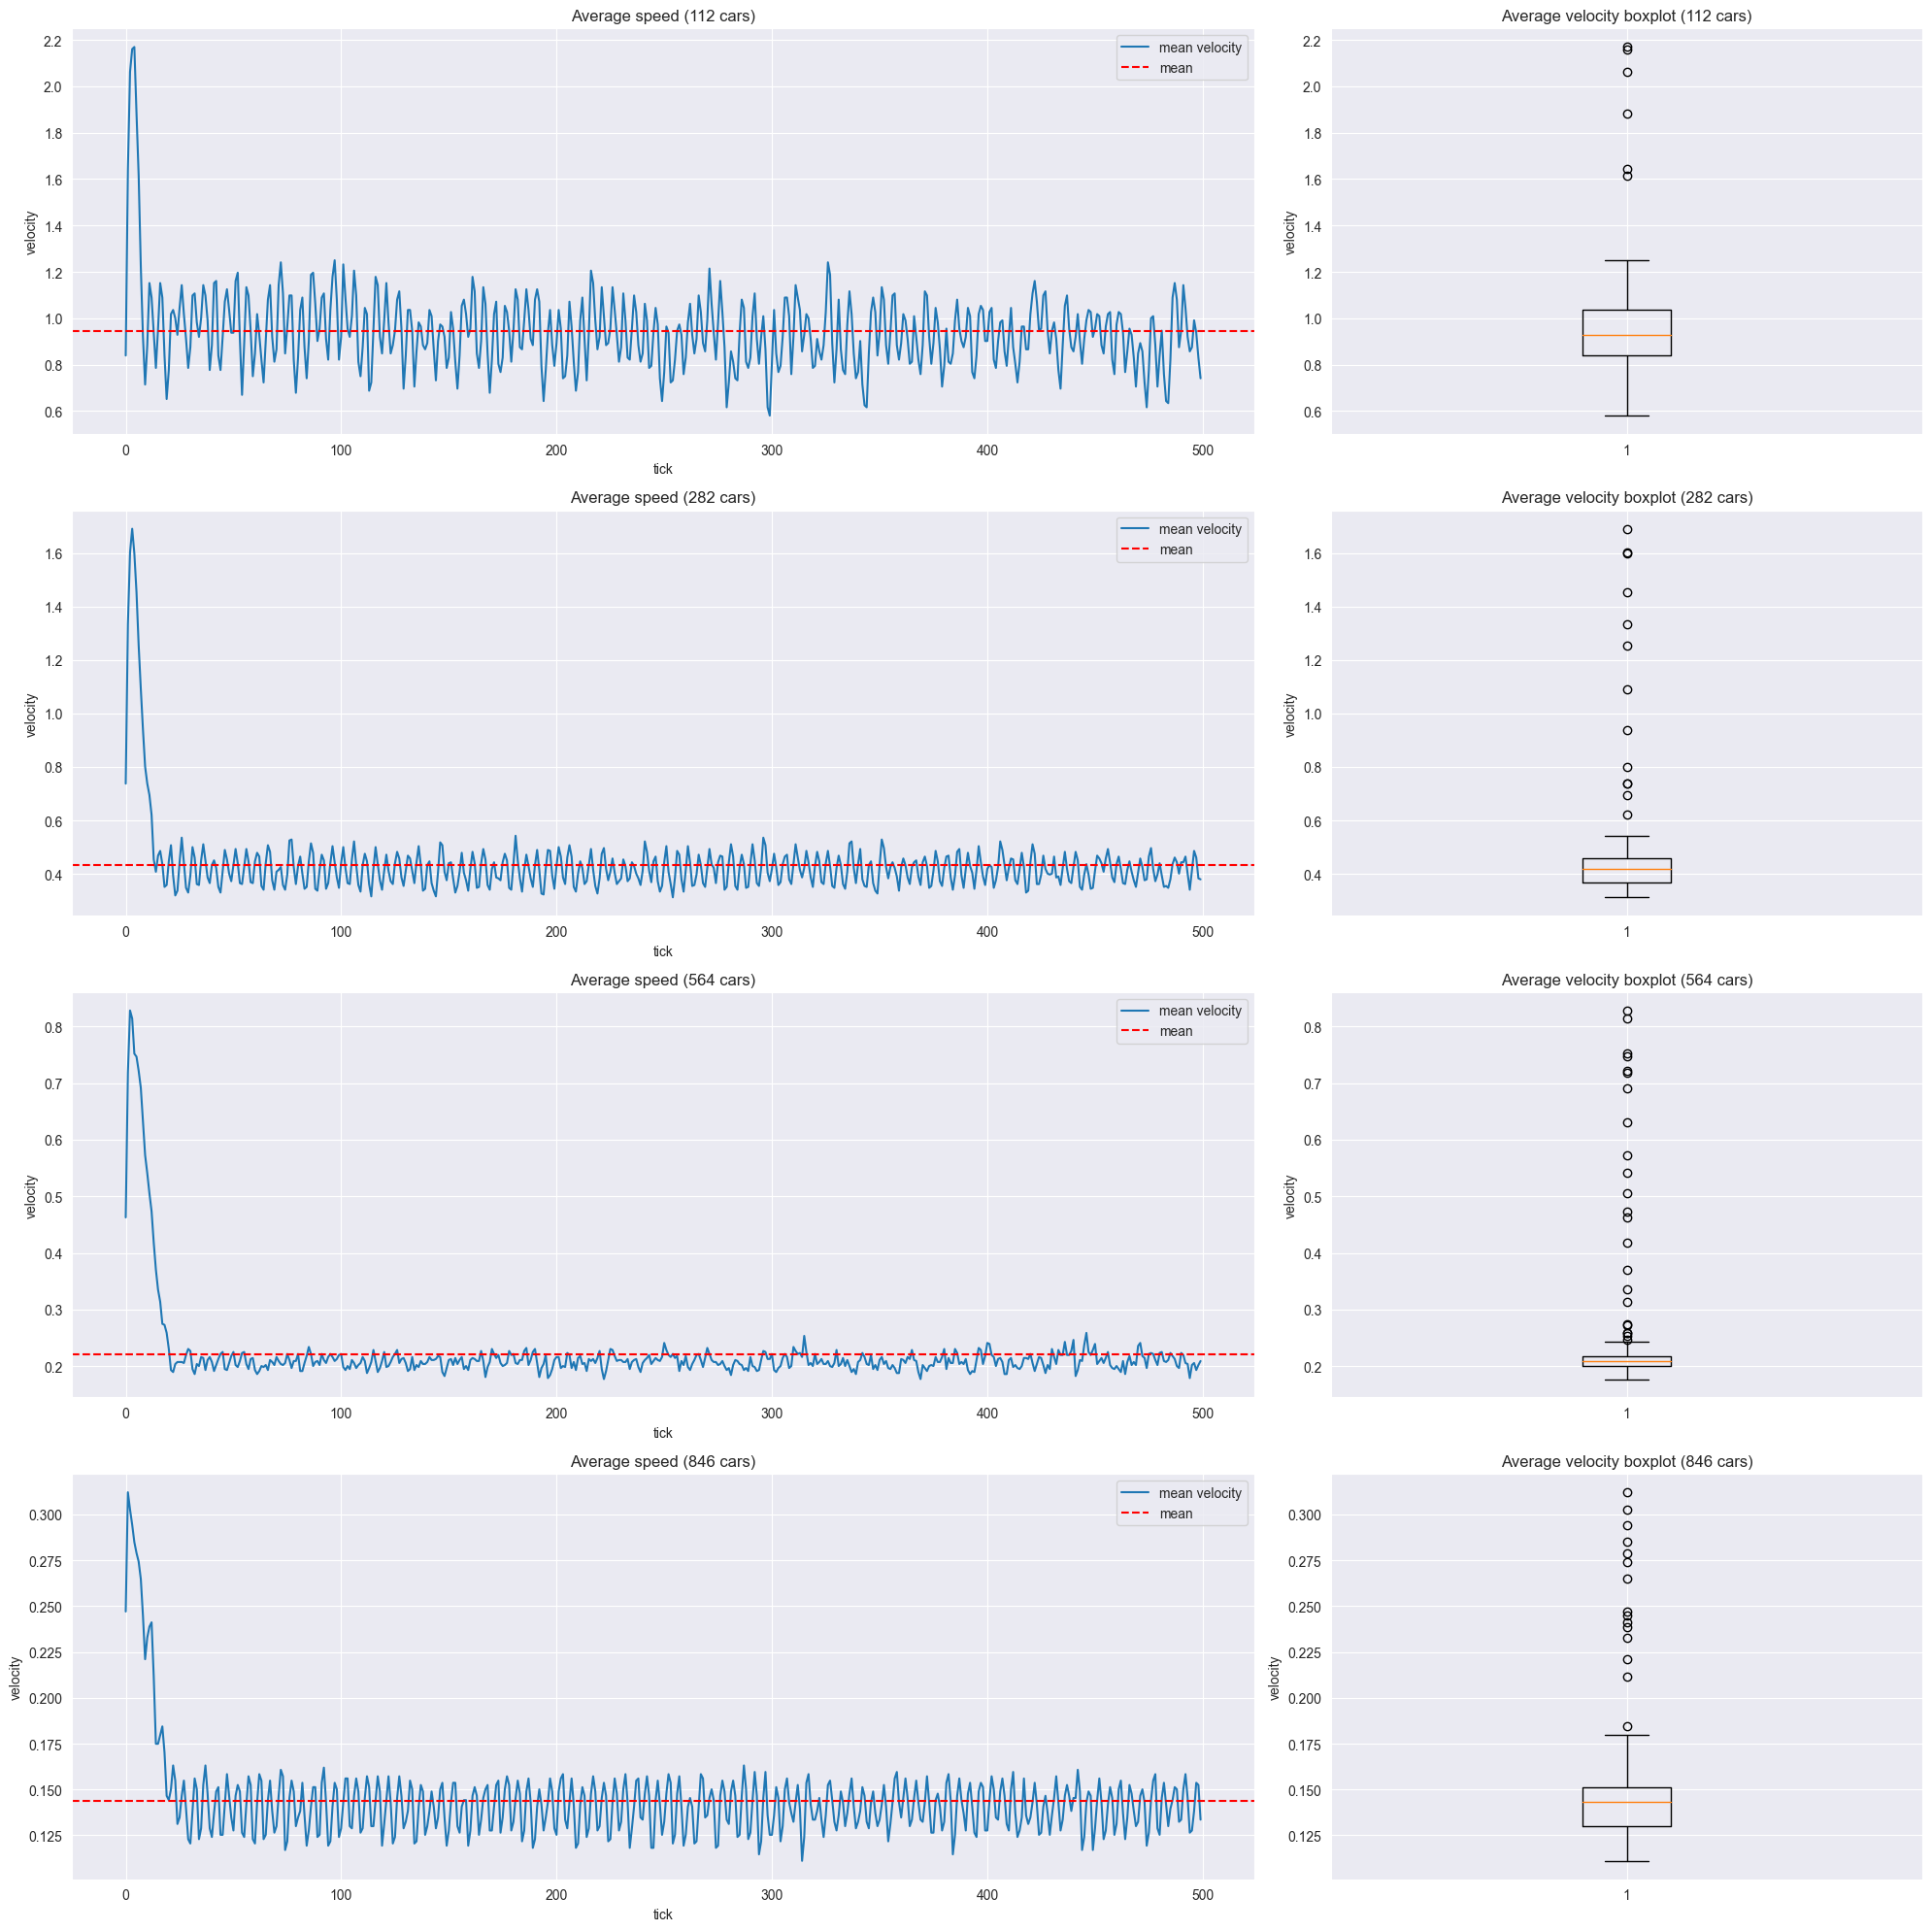

In [36]:
s.generate_average_speed_plots(mean_vs_lists[0:4], cars_numbers)

## Average speed (lights time = 10)

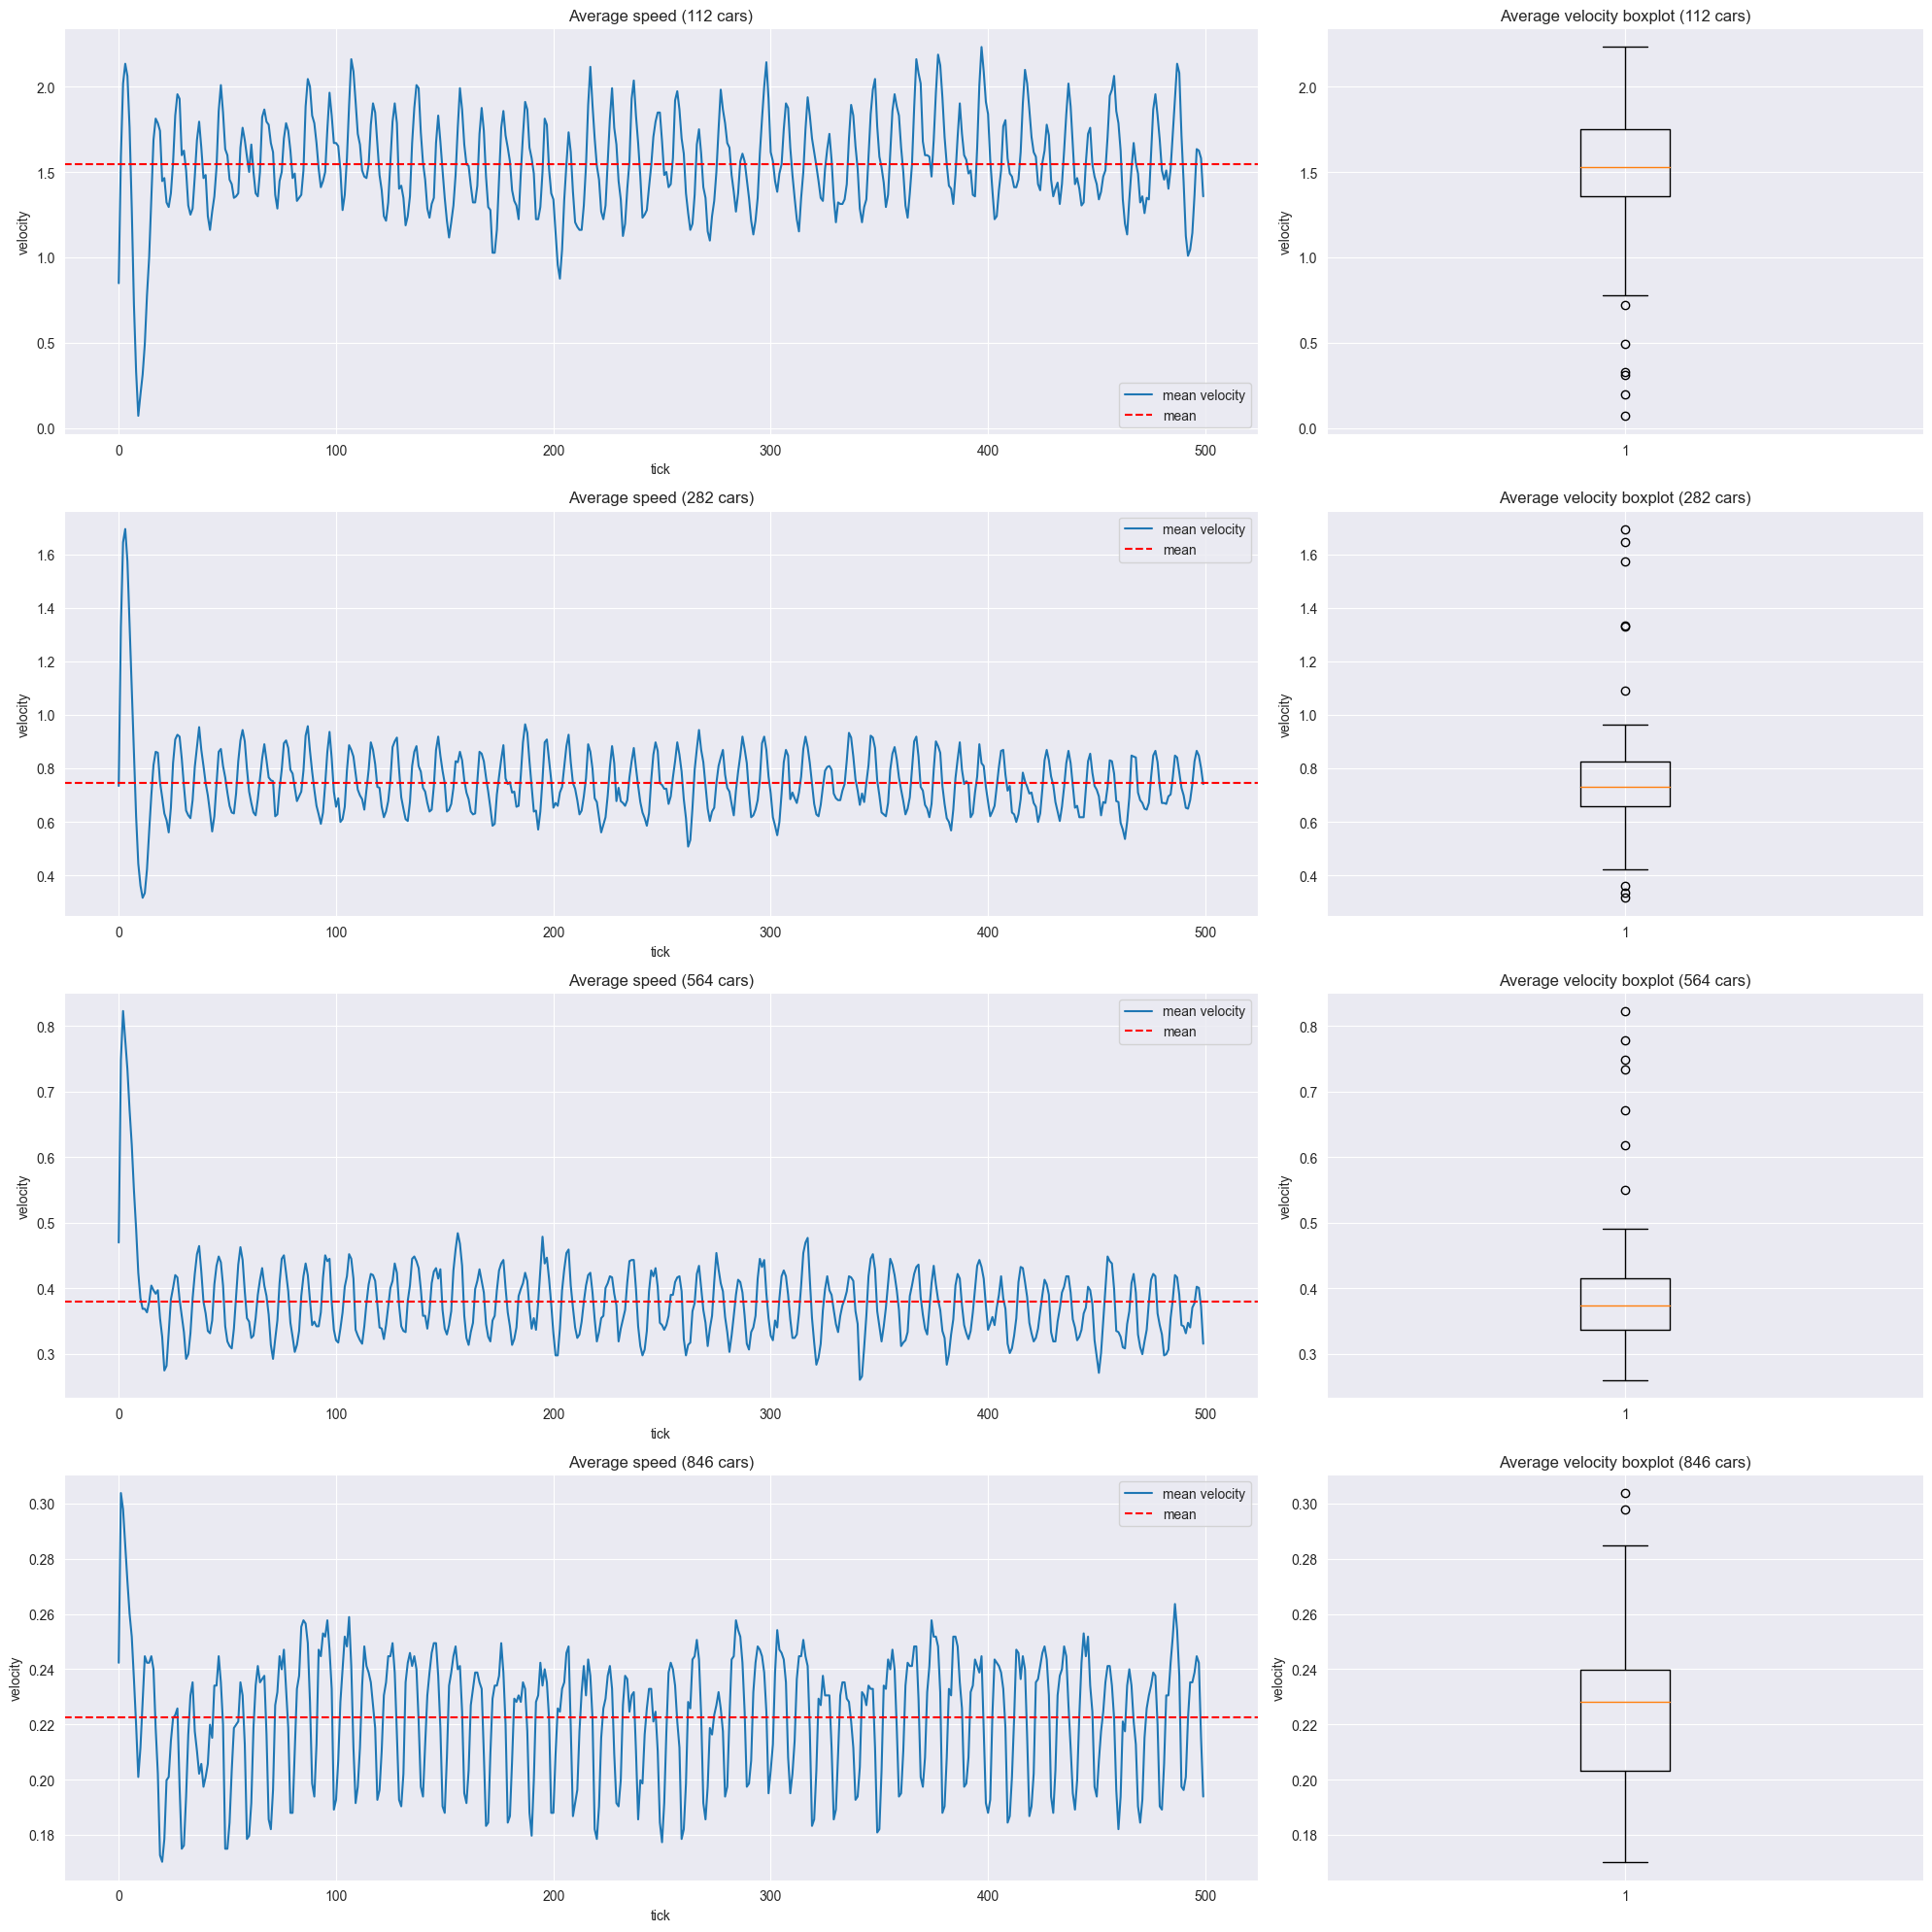

In [37]:
s.generate_average_speed_plots(mean_vs_lists[4:8], cars_numbers)

## Average speed (lights time = 15)

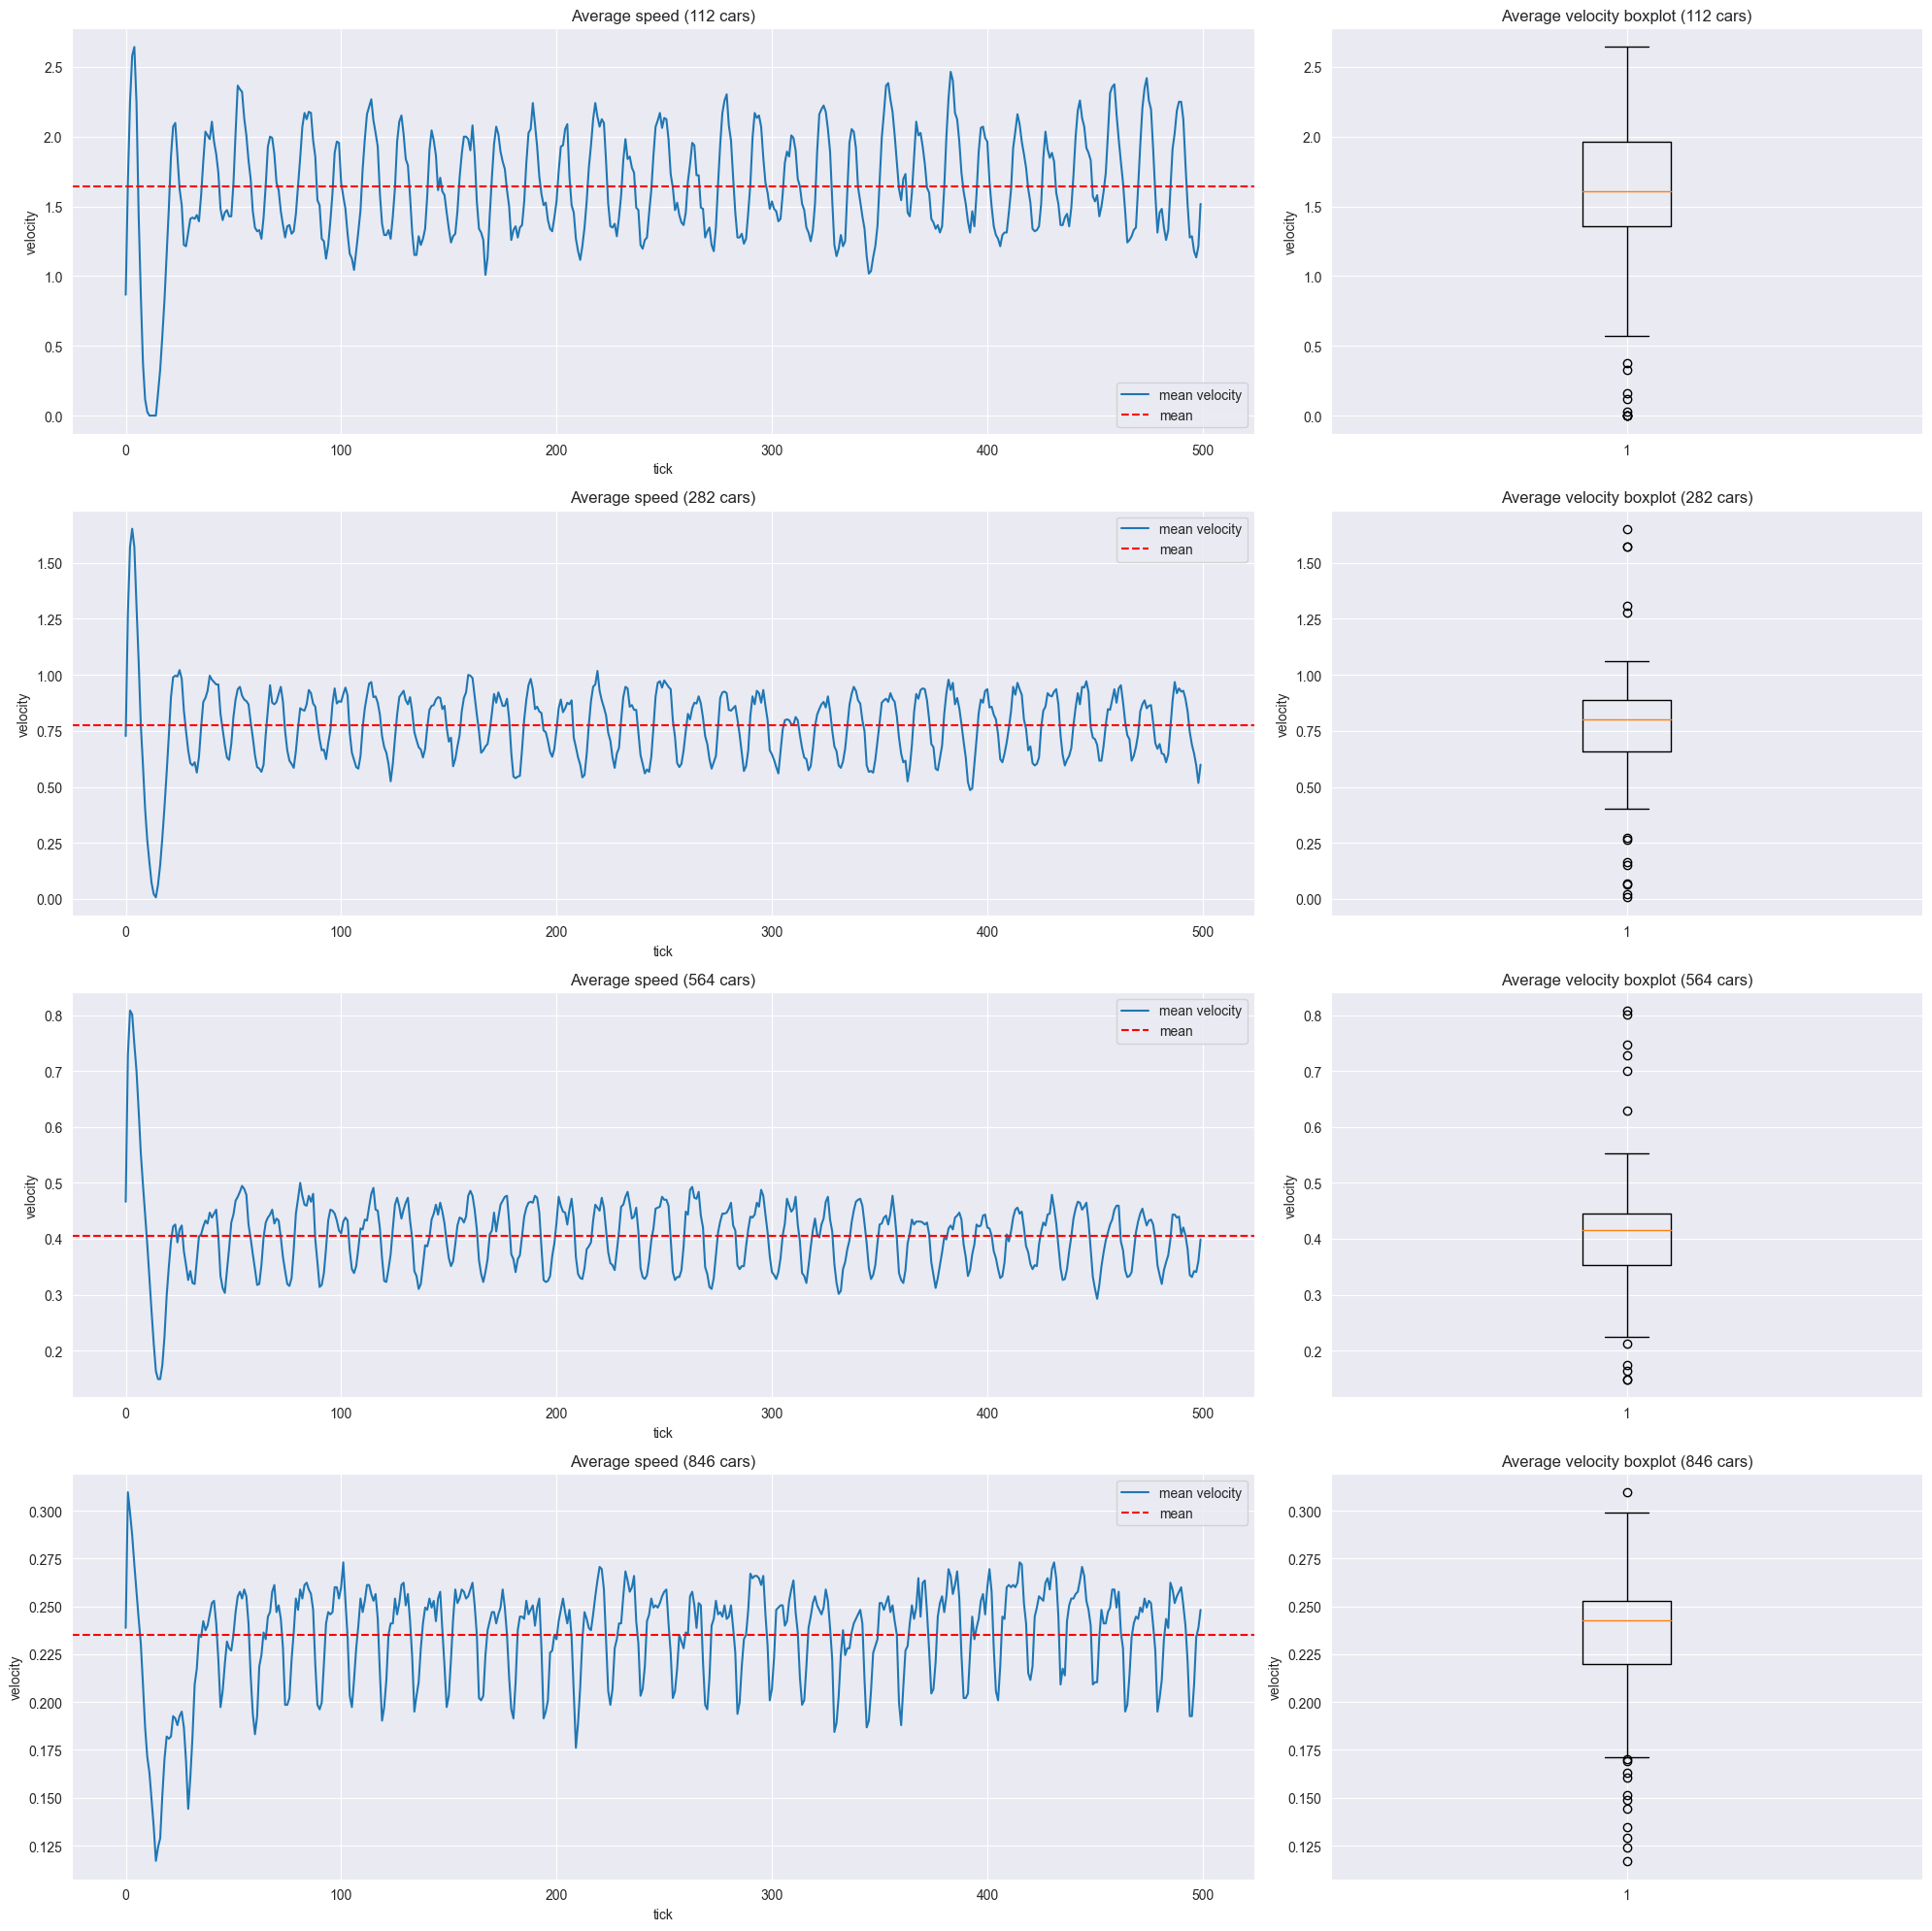

In [38]:
s.generate_average_speed_plots(mean_vs_lists[8:12], cars_numbers)

## Stop/Moving cars (lights time = 5)

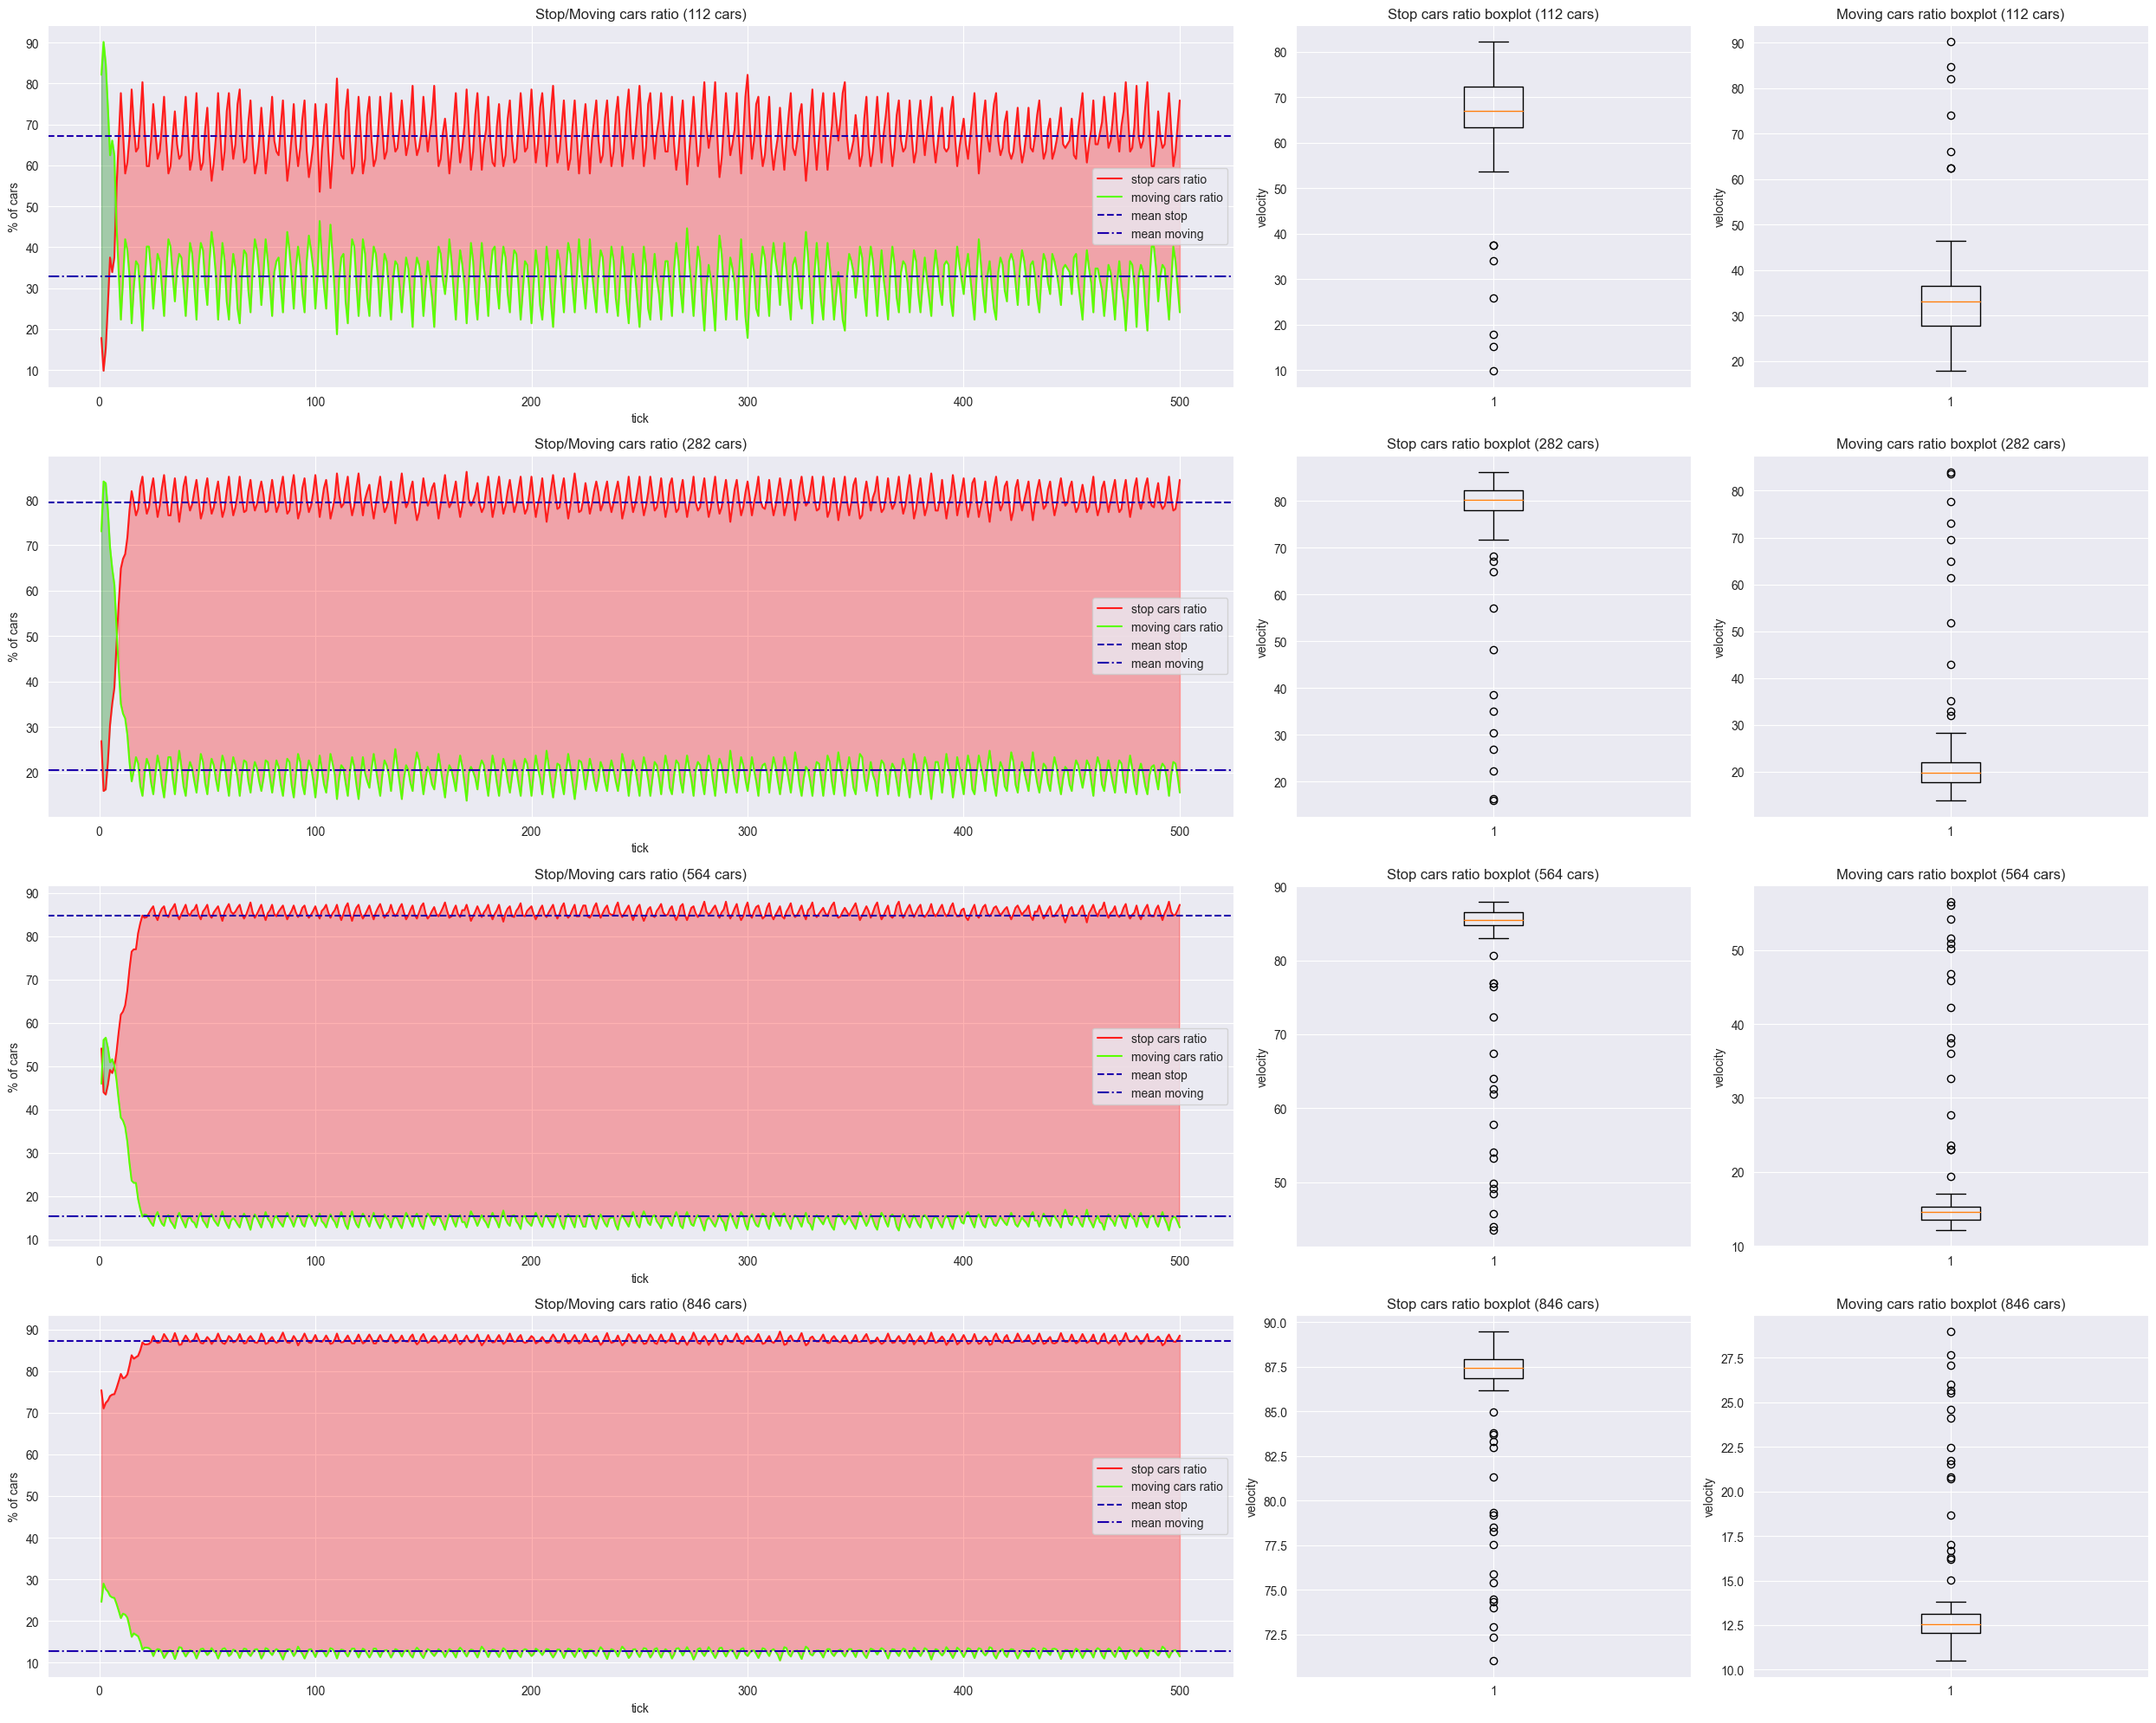

In [33]:
s.generate_stop_moving_cars_plots(stop_cars_lists[0:4], moving_cars_list[0:4], cars_numbers, TICKS)

## Stop/Moving cars (lights time = 10)

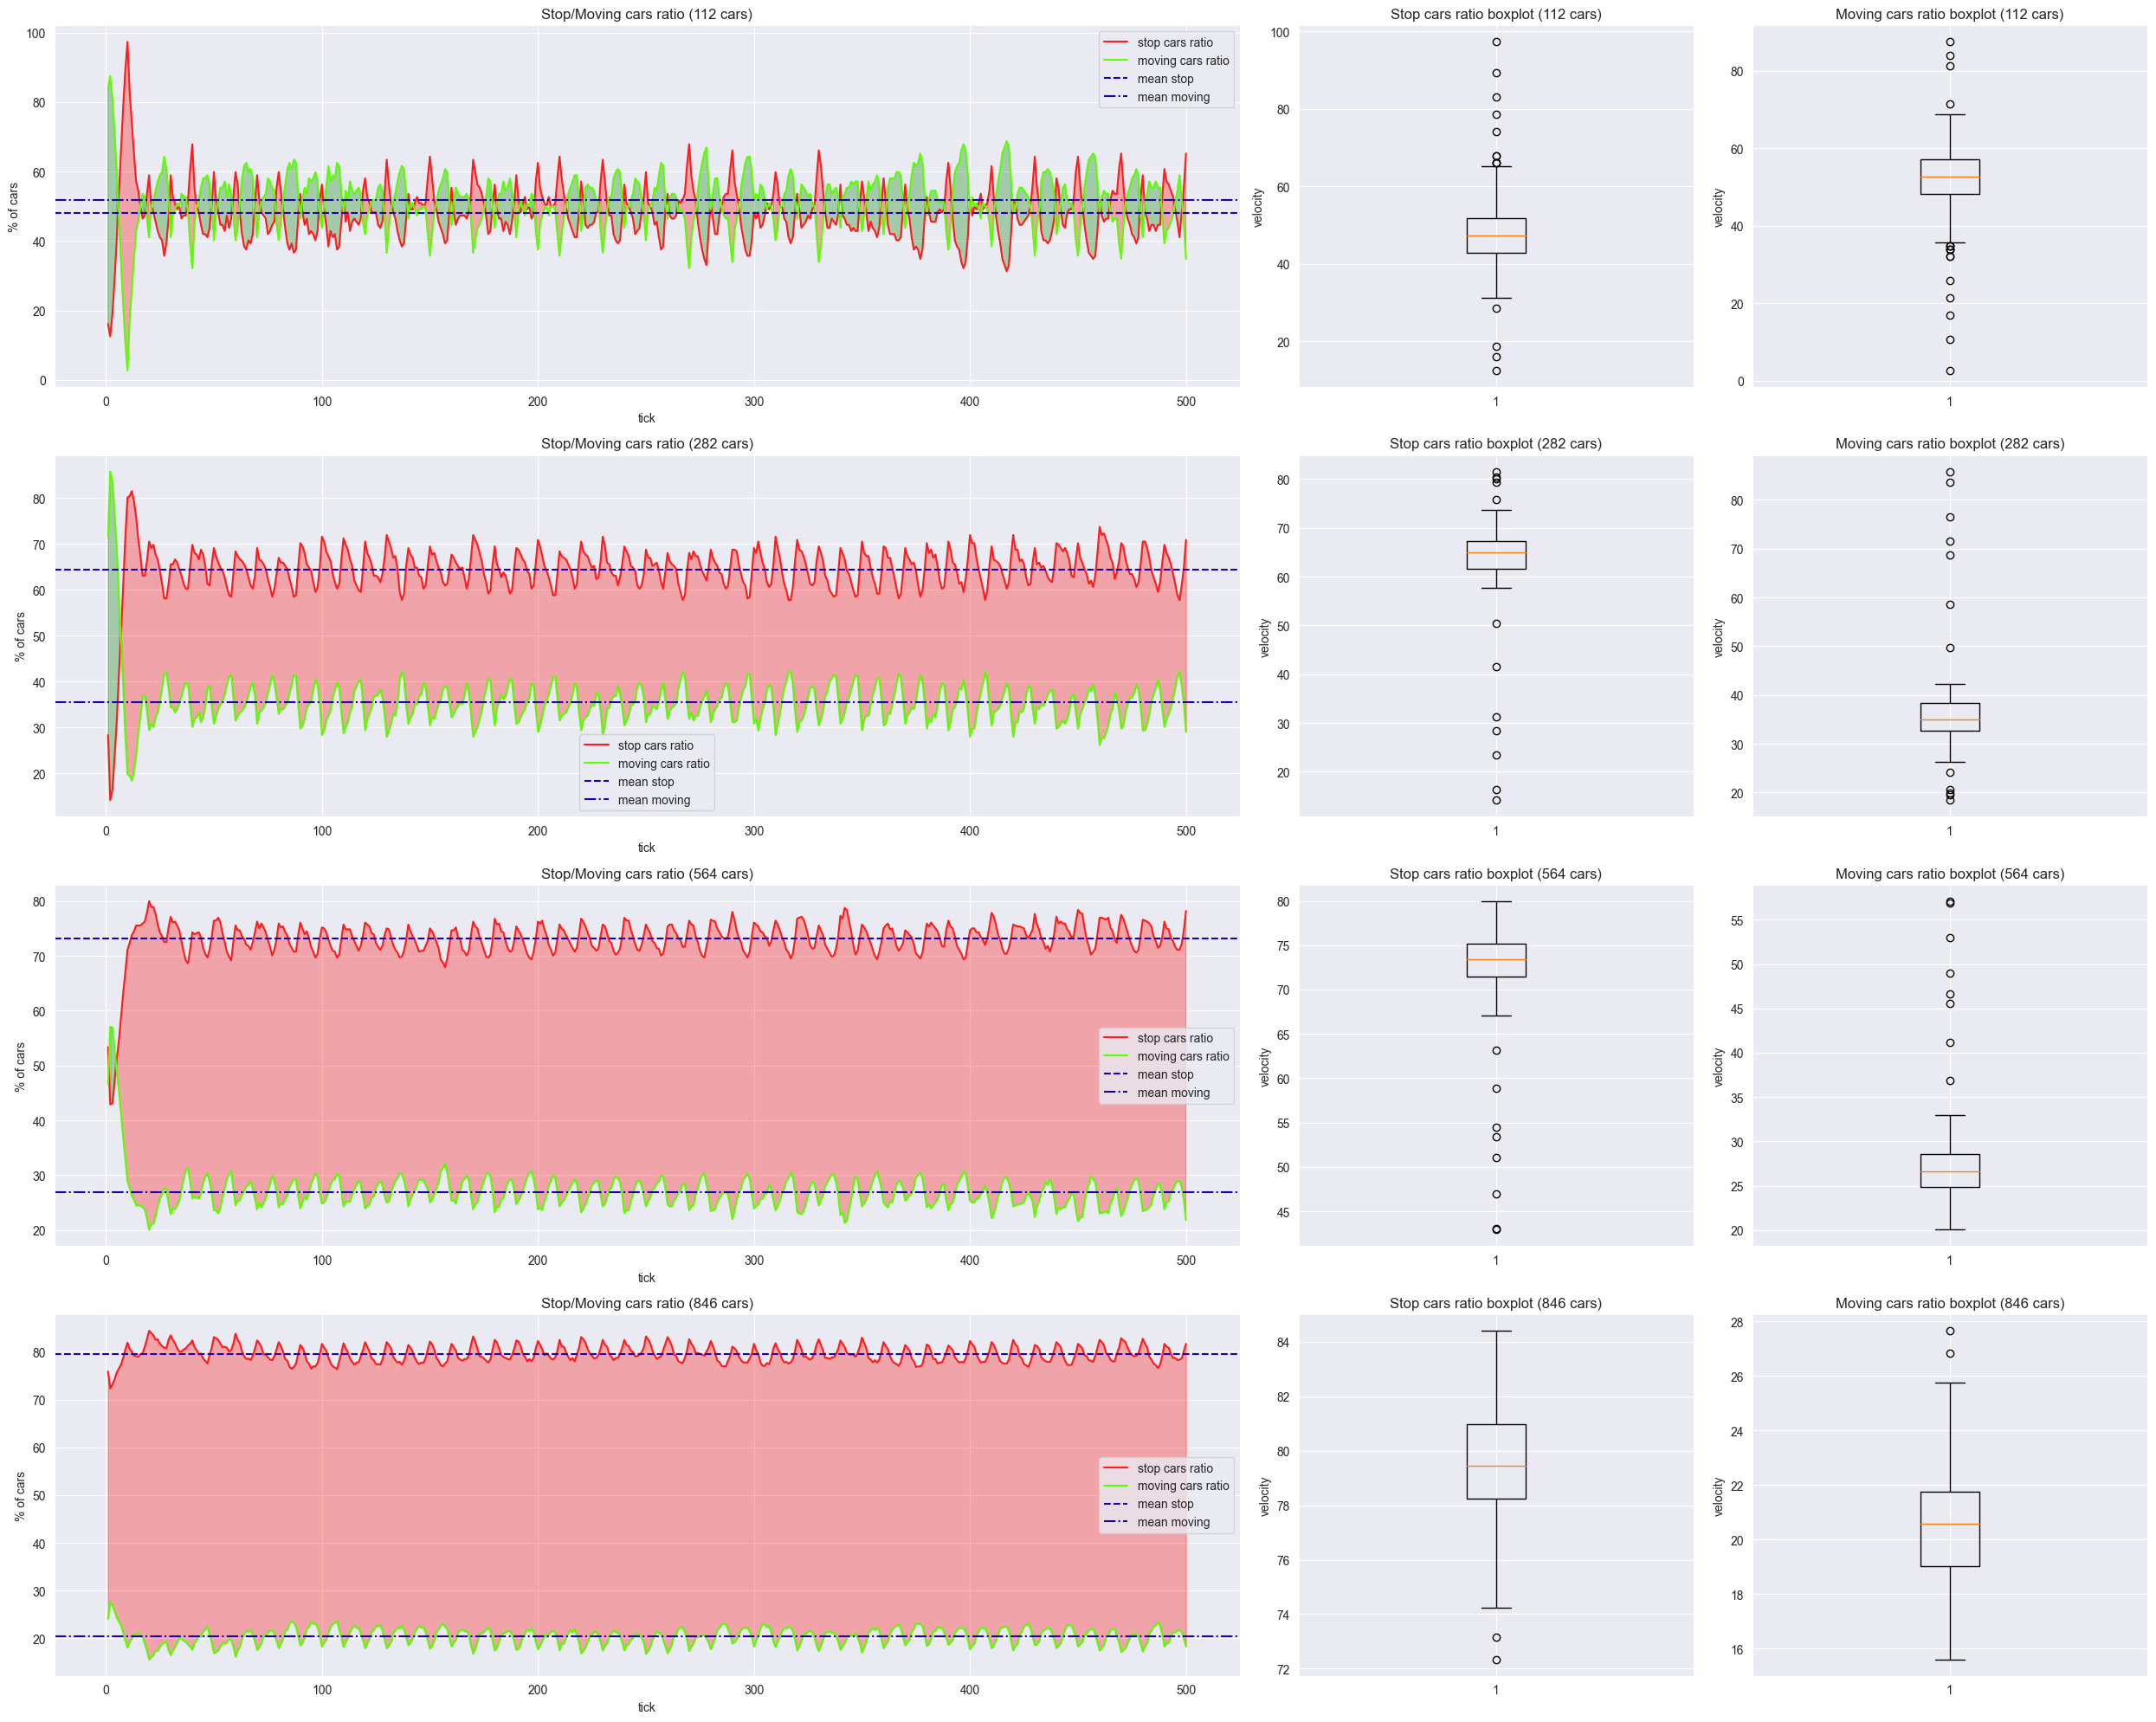

In [34]:
s.generate_stop_moving_cars_plots(stop_cars_lists[4:8], moving_cars_list[4:8], cars_numbers, TICKS)

## Stop/Moving cars (lights time = 15)

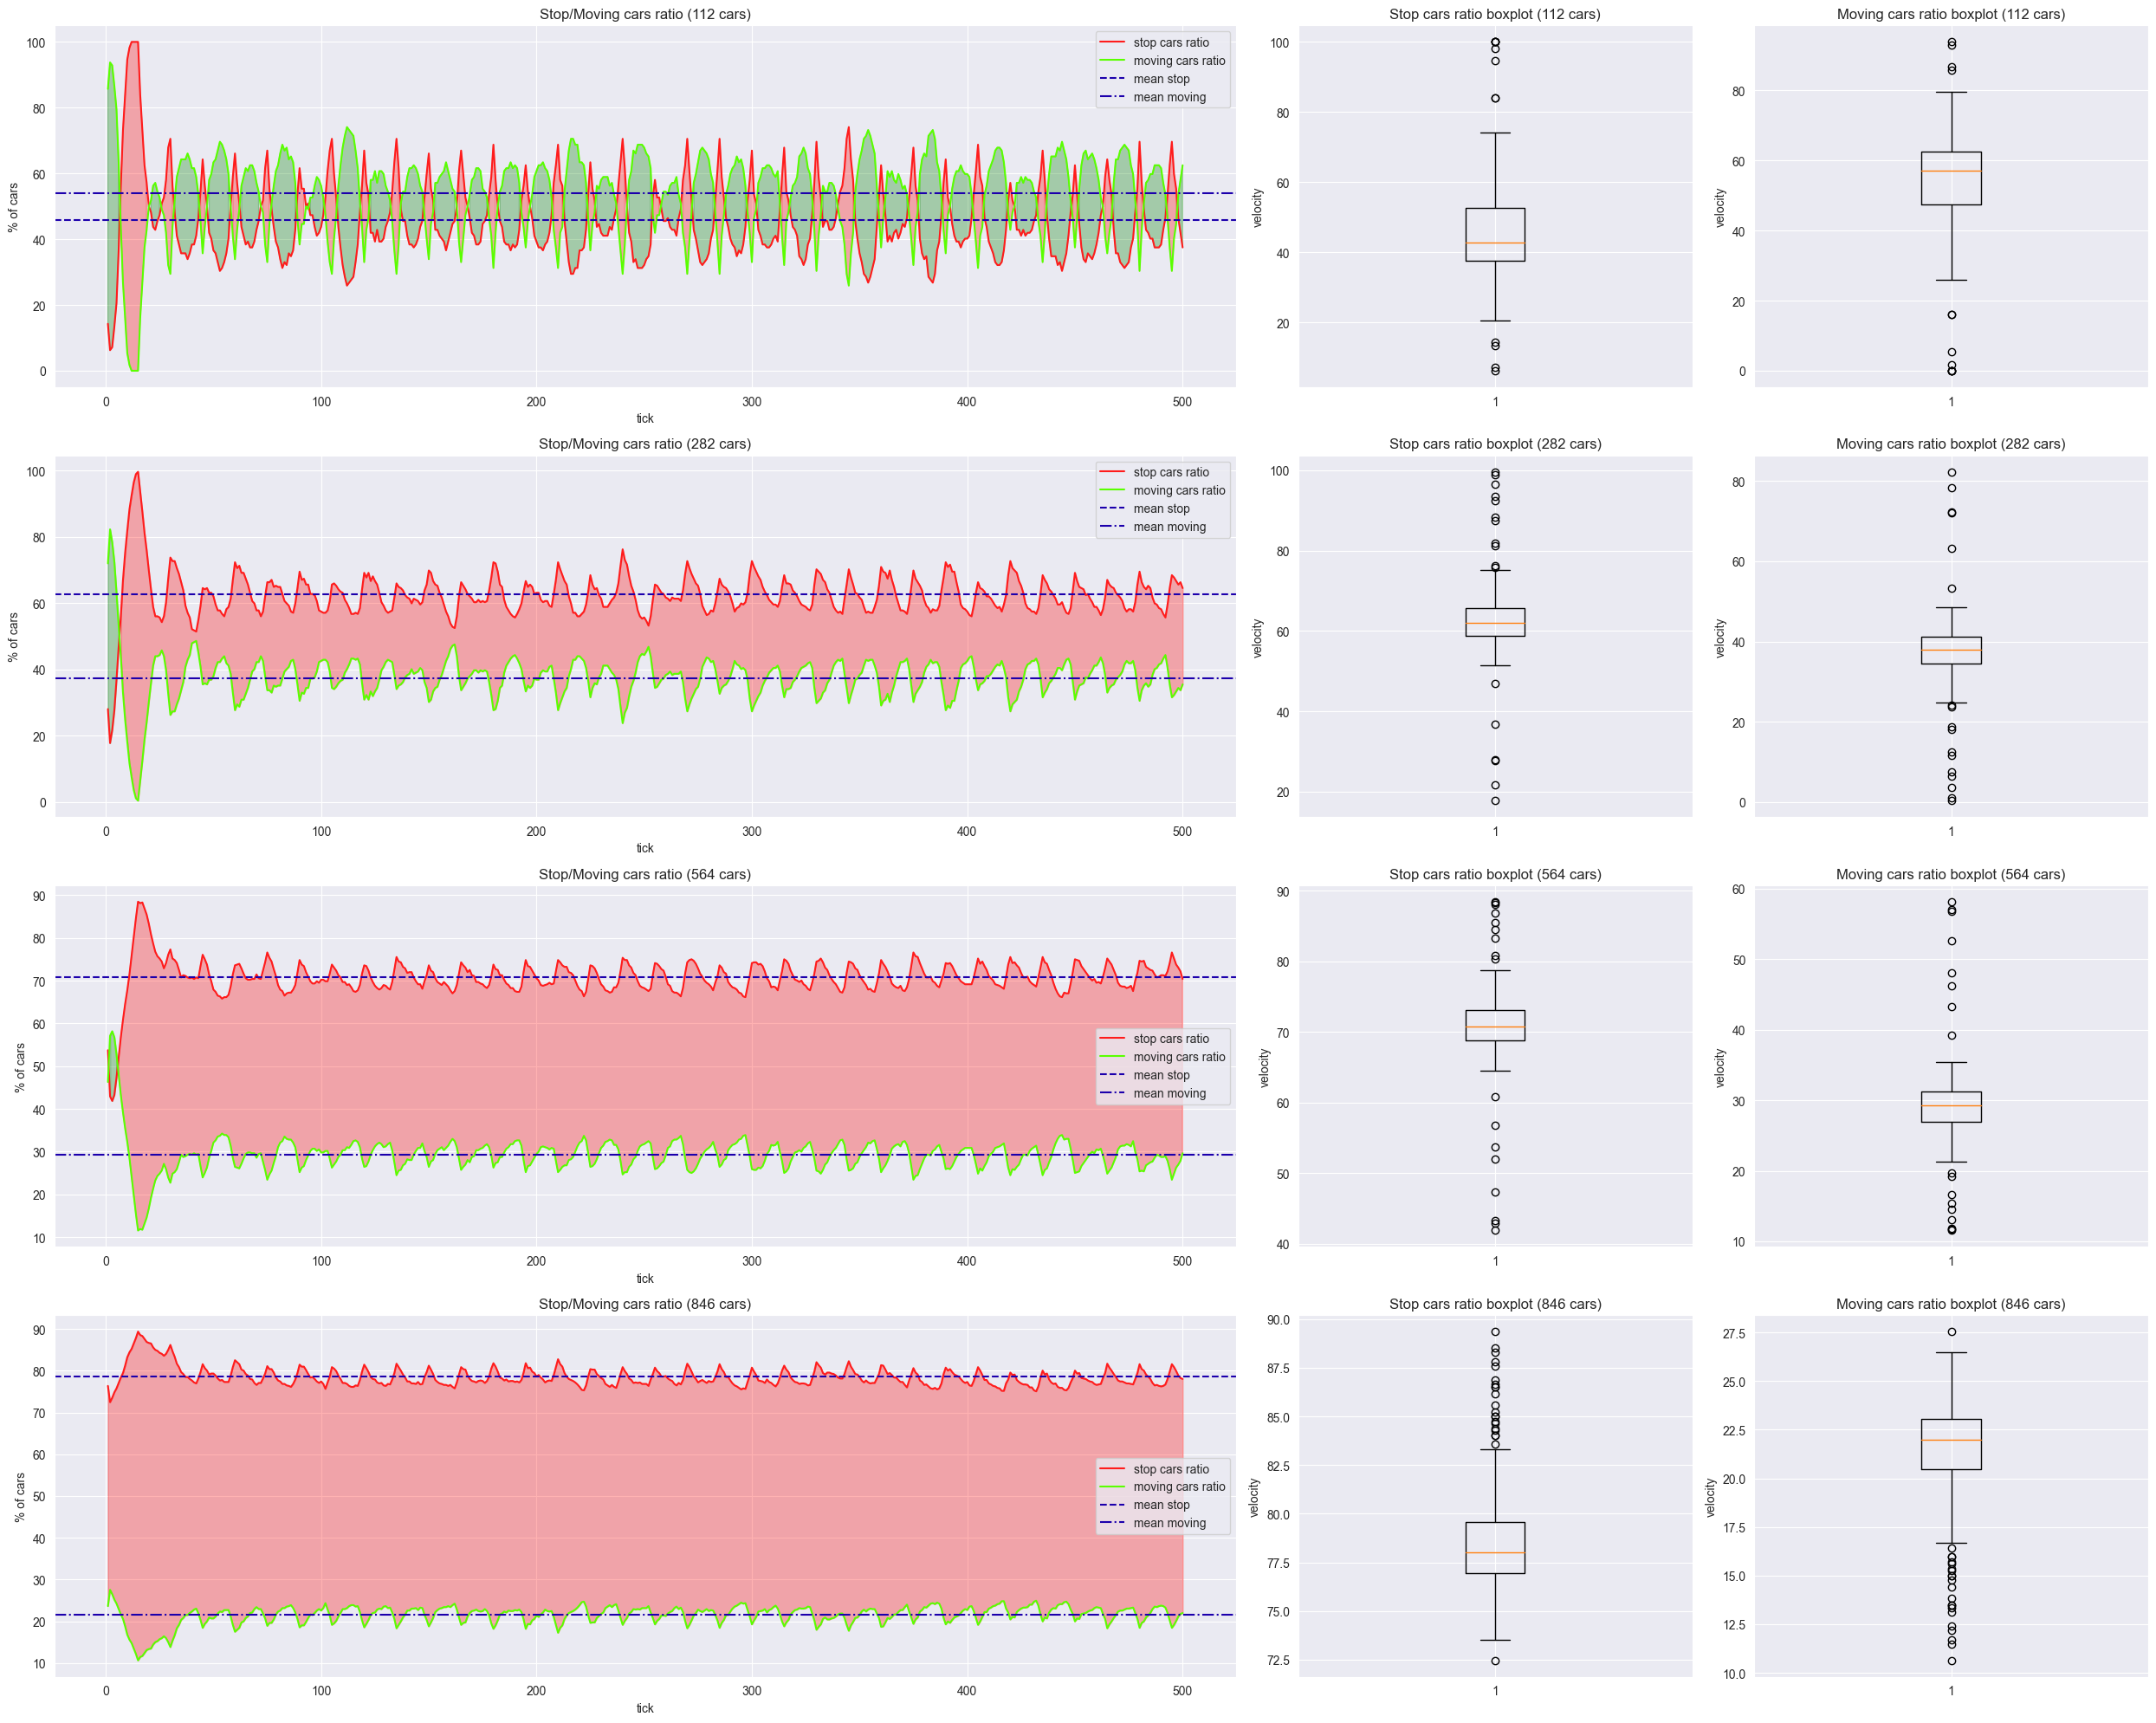

In [35]:
s.generate_stop_moving_cars_plots(stop_cars_lists[8:12], moving_cars_list[8:12], cars_numbers, TICKS)

## Heatmaps (lights time = 5)

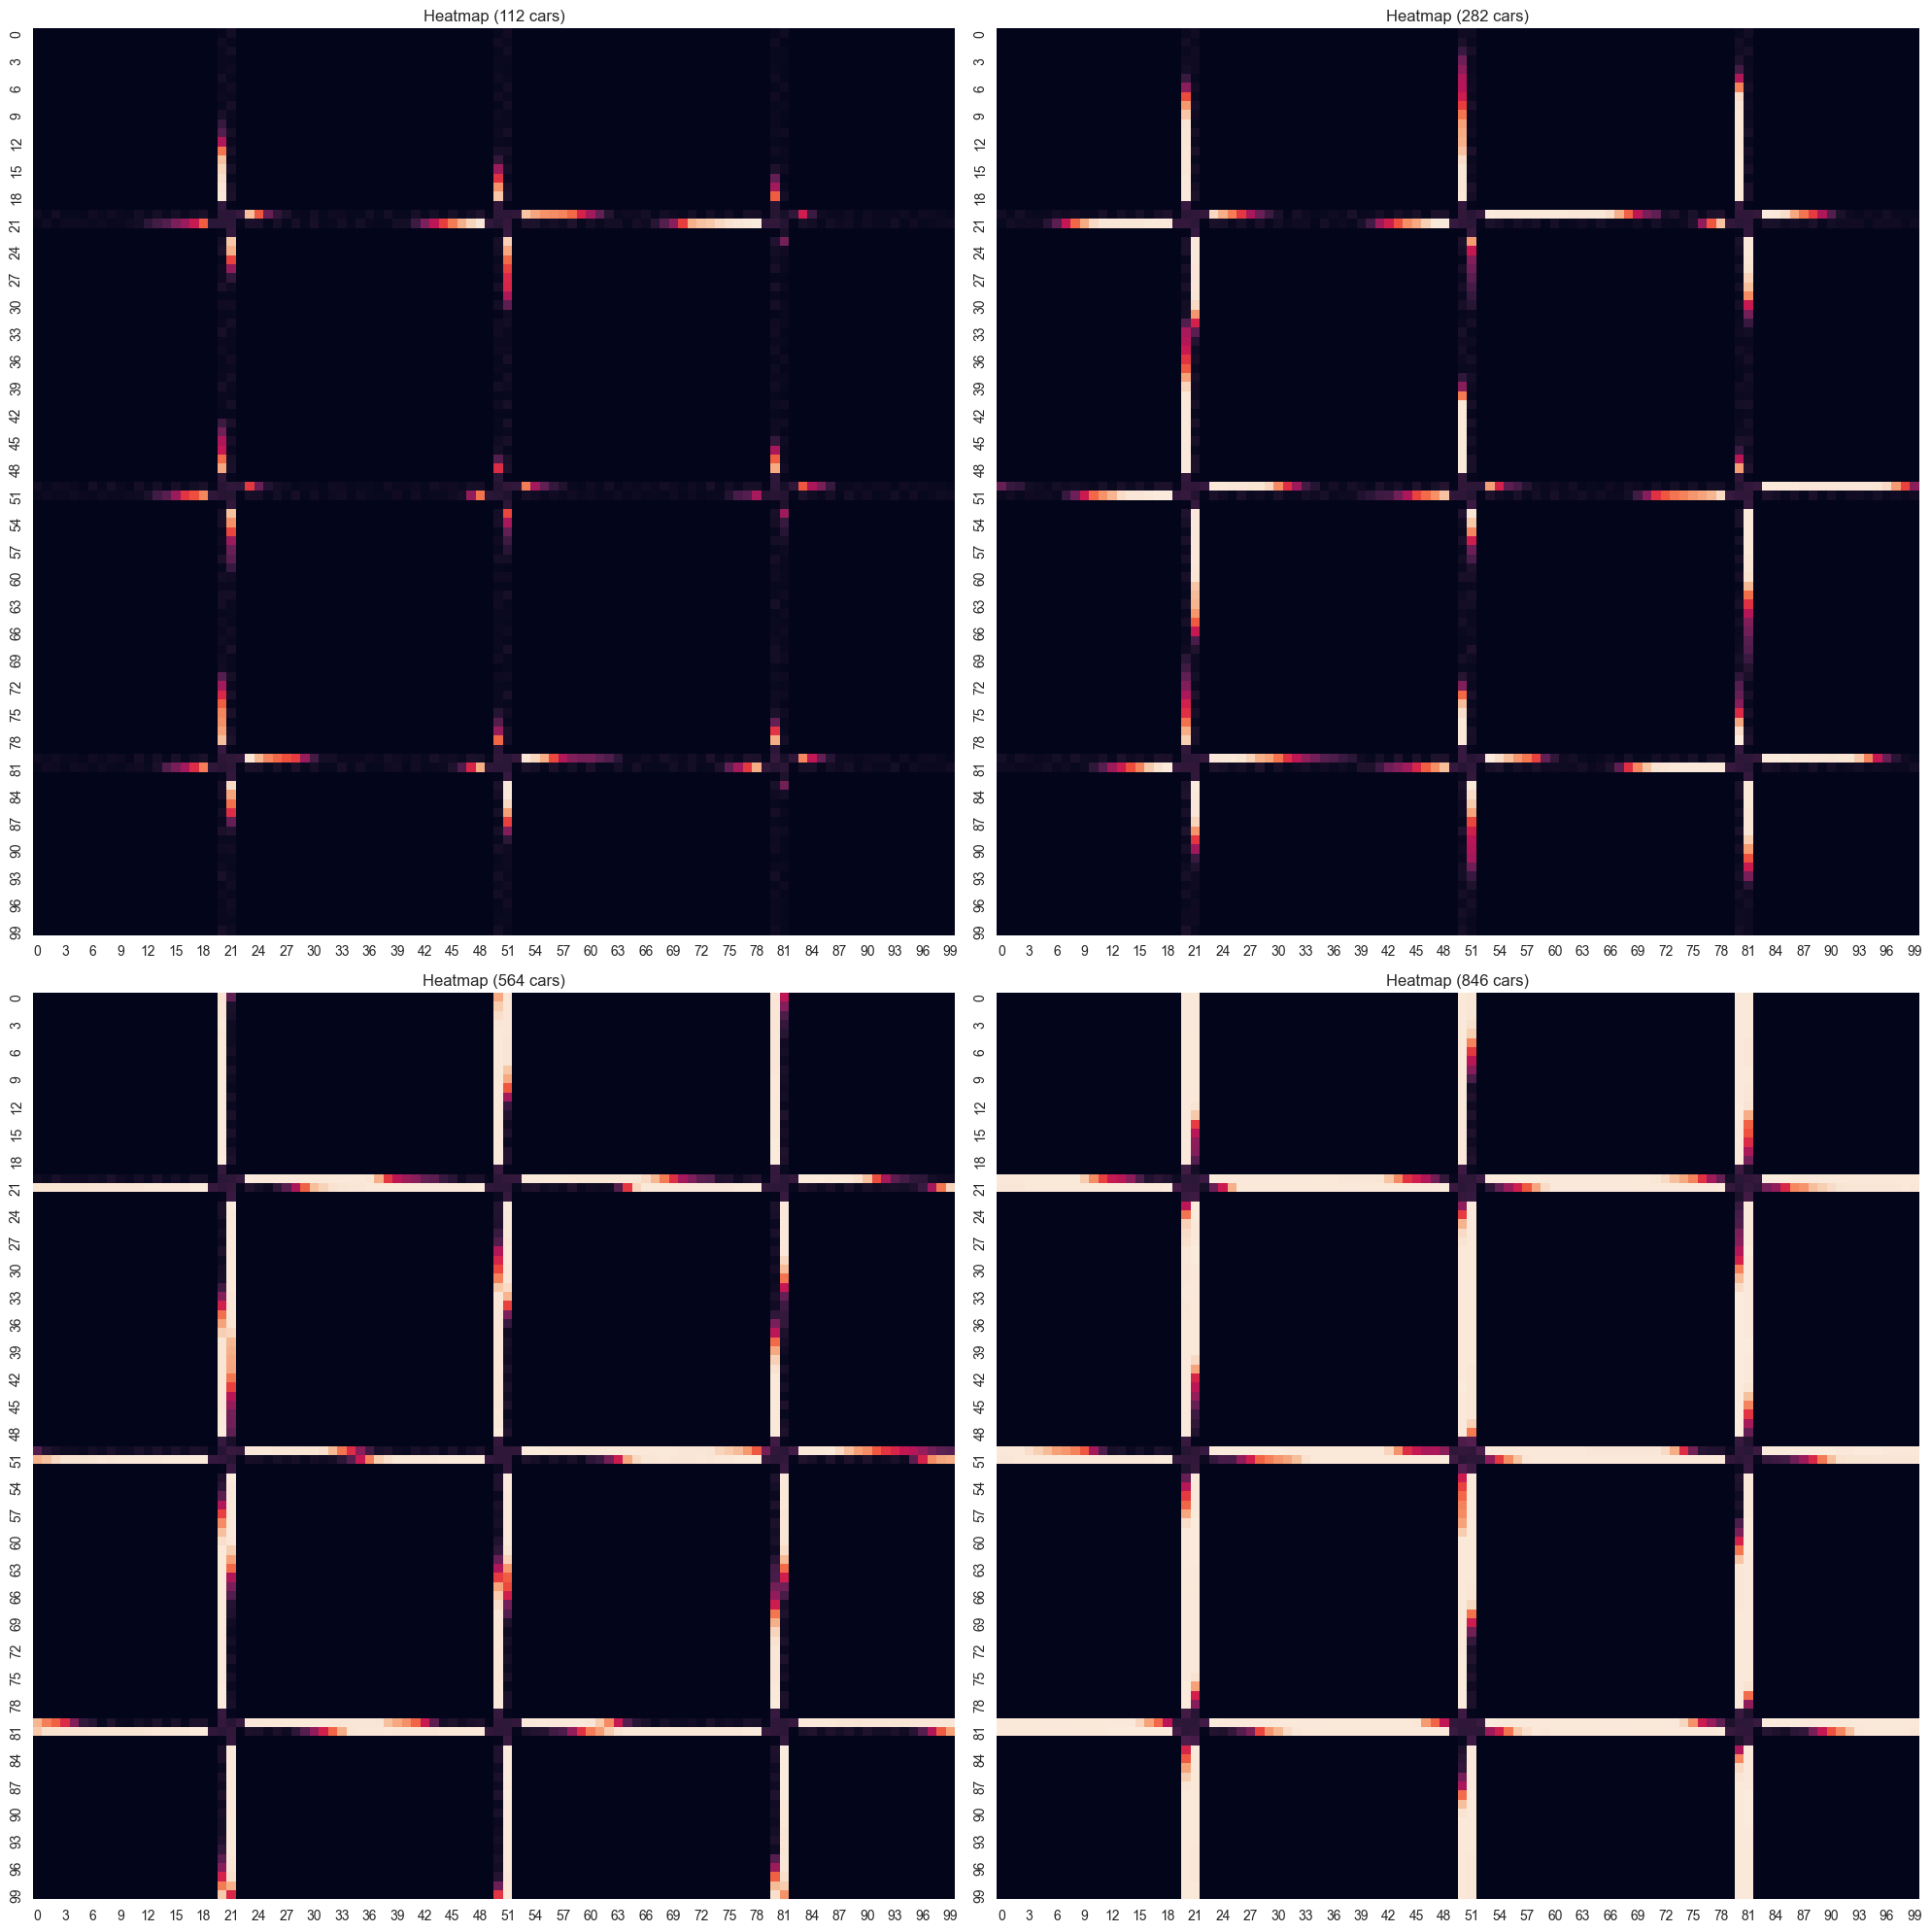

In [30]:
s.generate_heatmaps(heat_map_lists[0:4], cars_numbers)

## Heatmaps (lights time = 10)

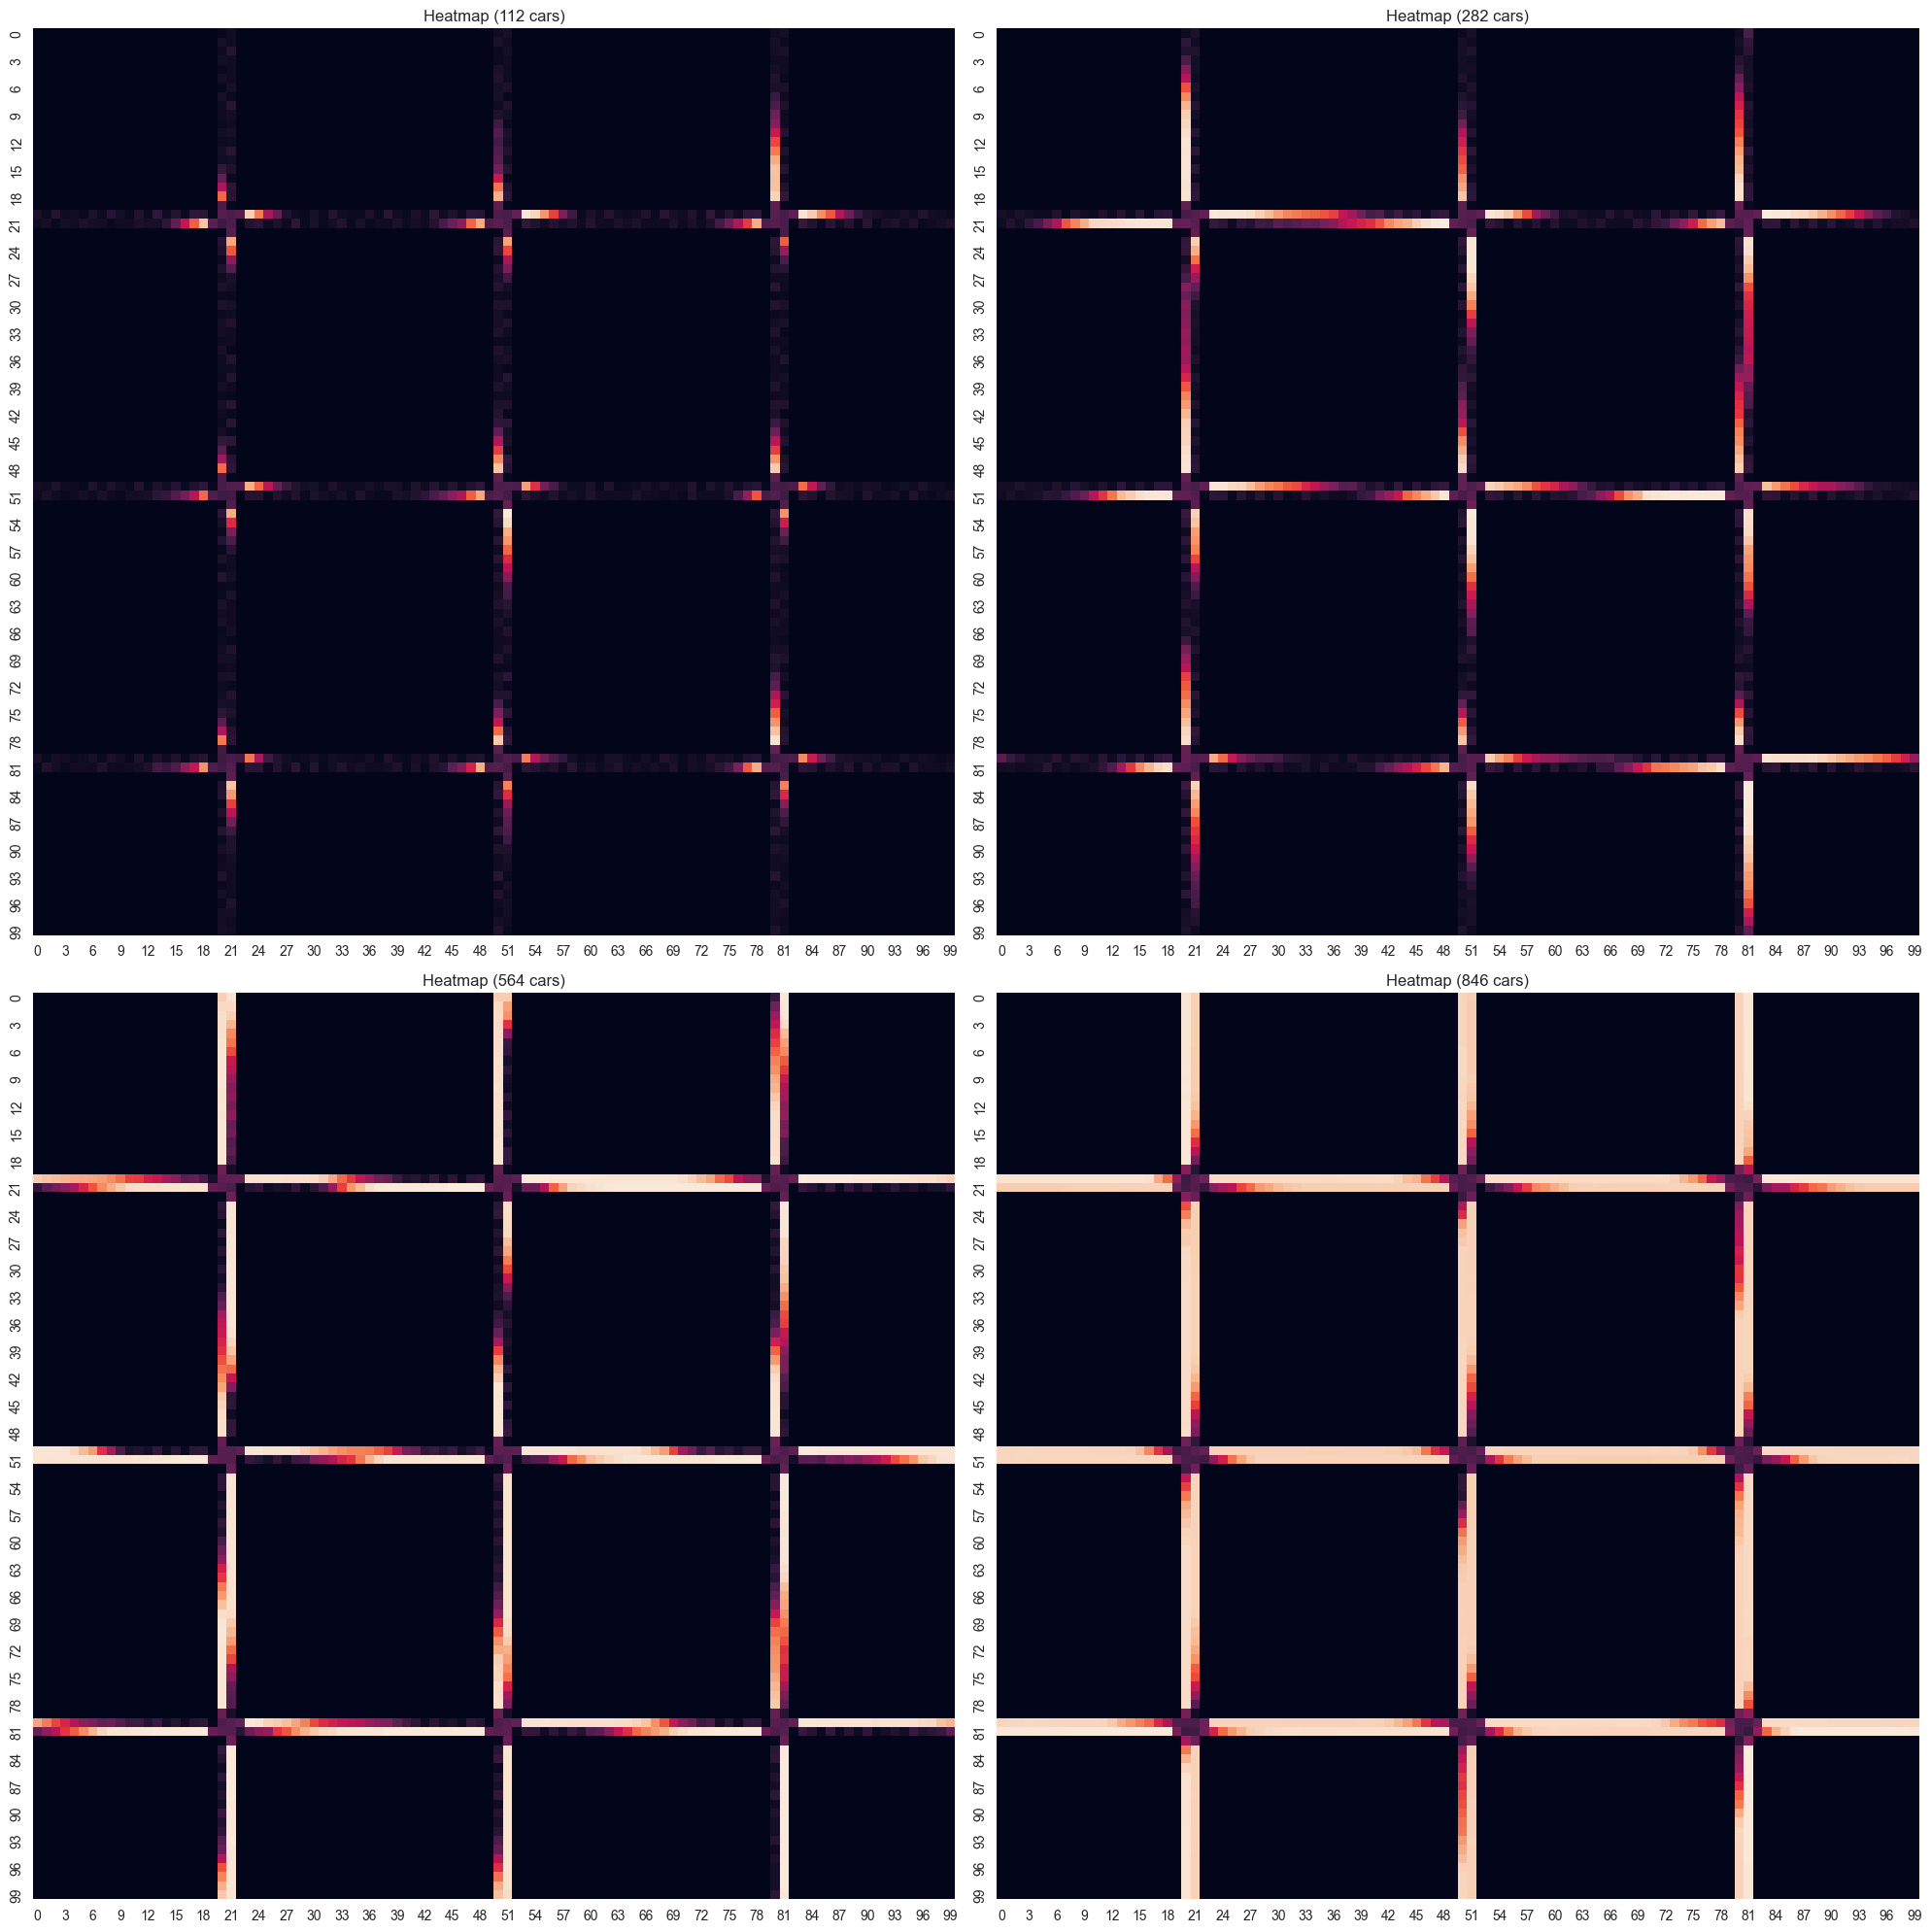

In [31]:
s.generate_heatmaps(heat_map_lists[4:8], cars_numbers)

## Heatmaps (lights time = 15)

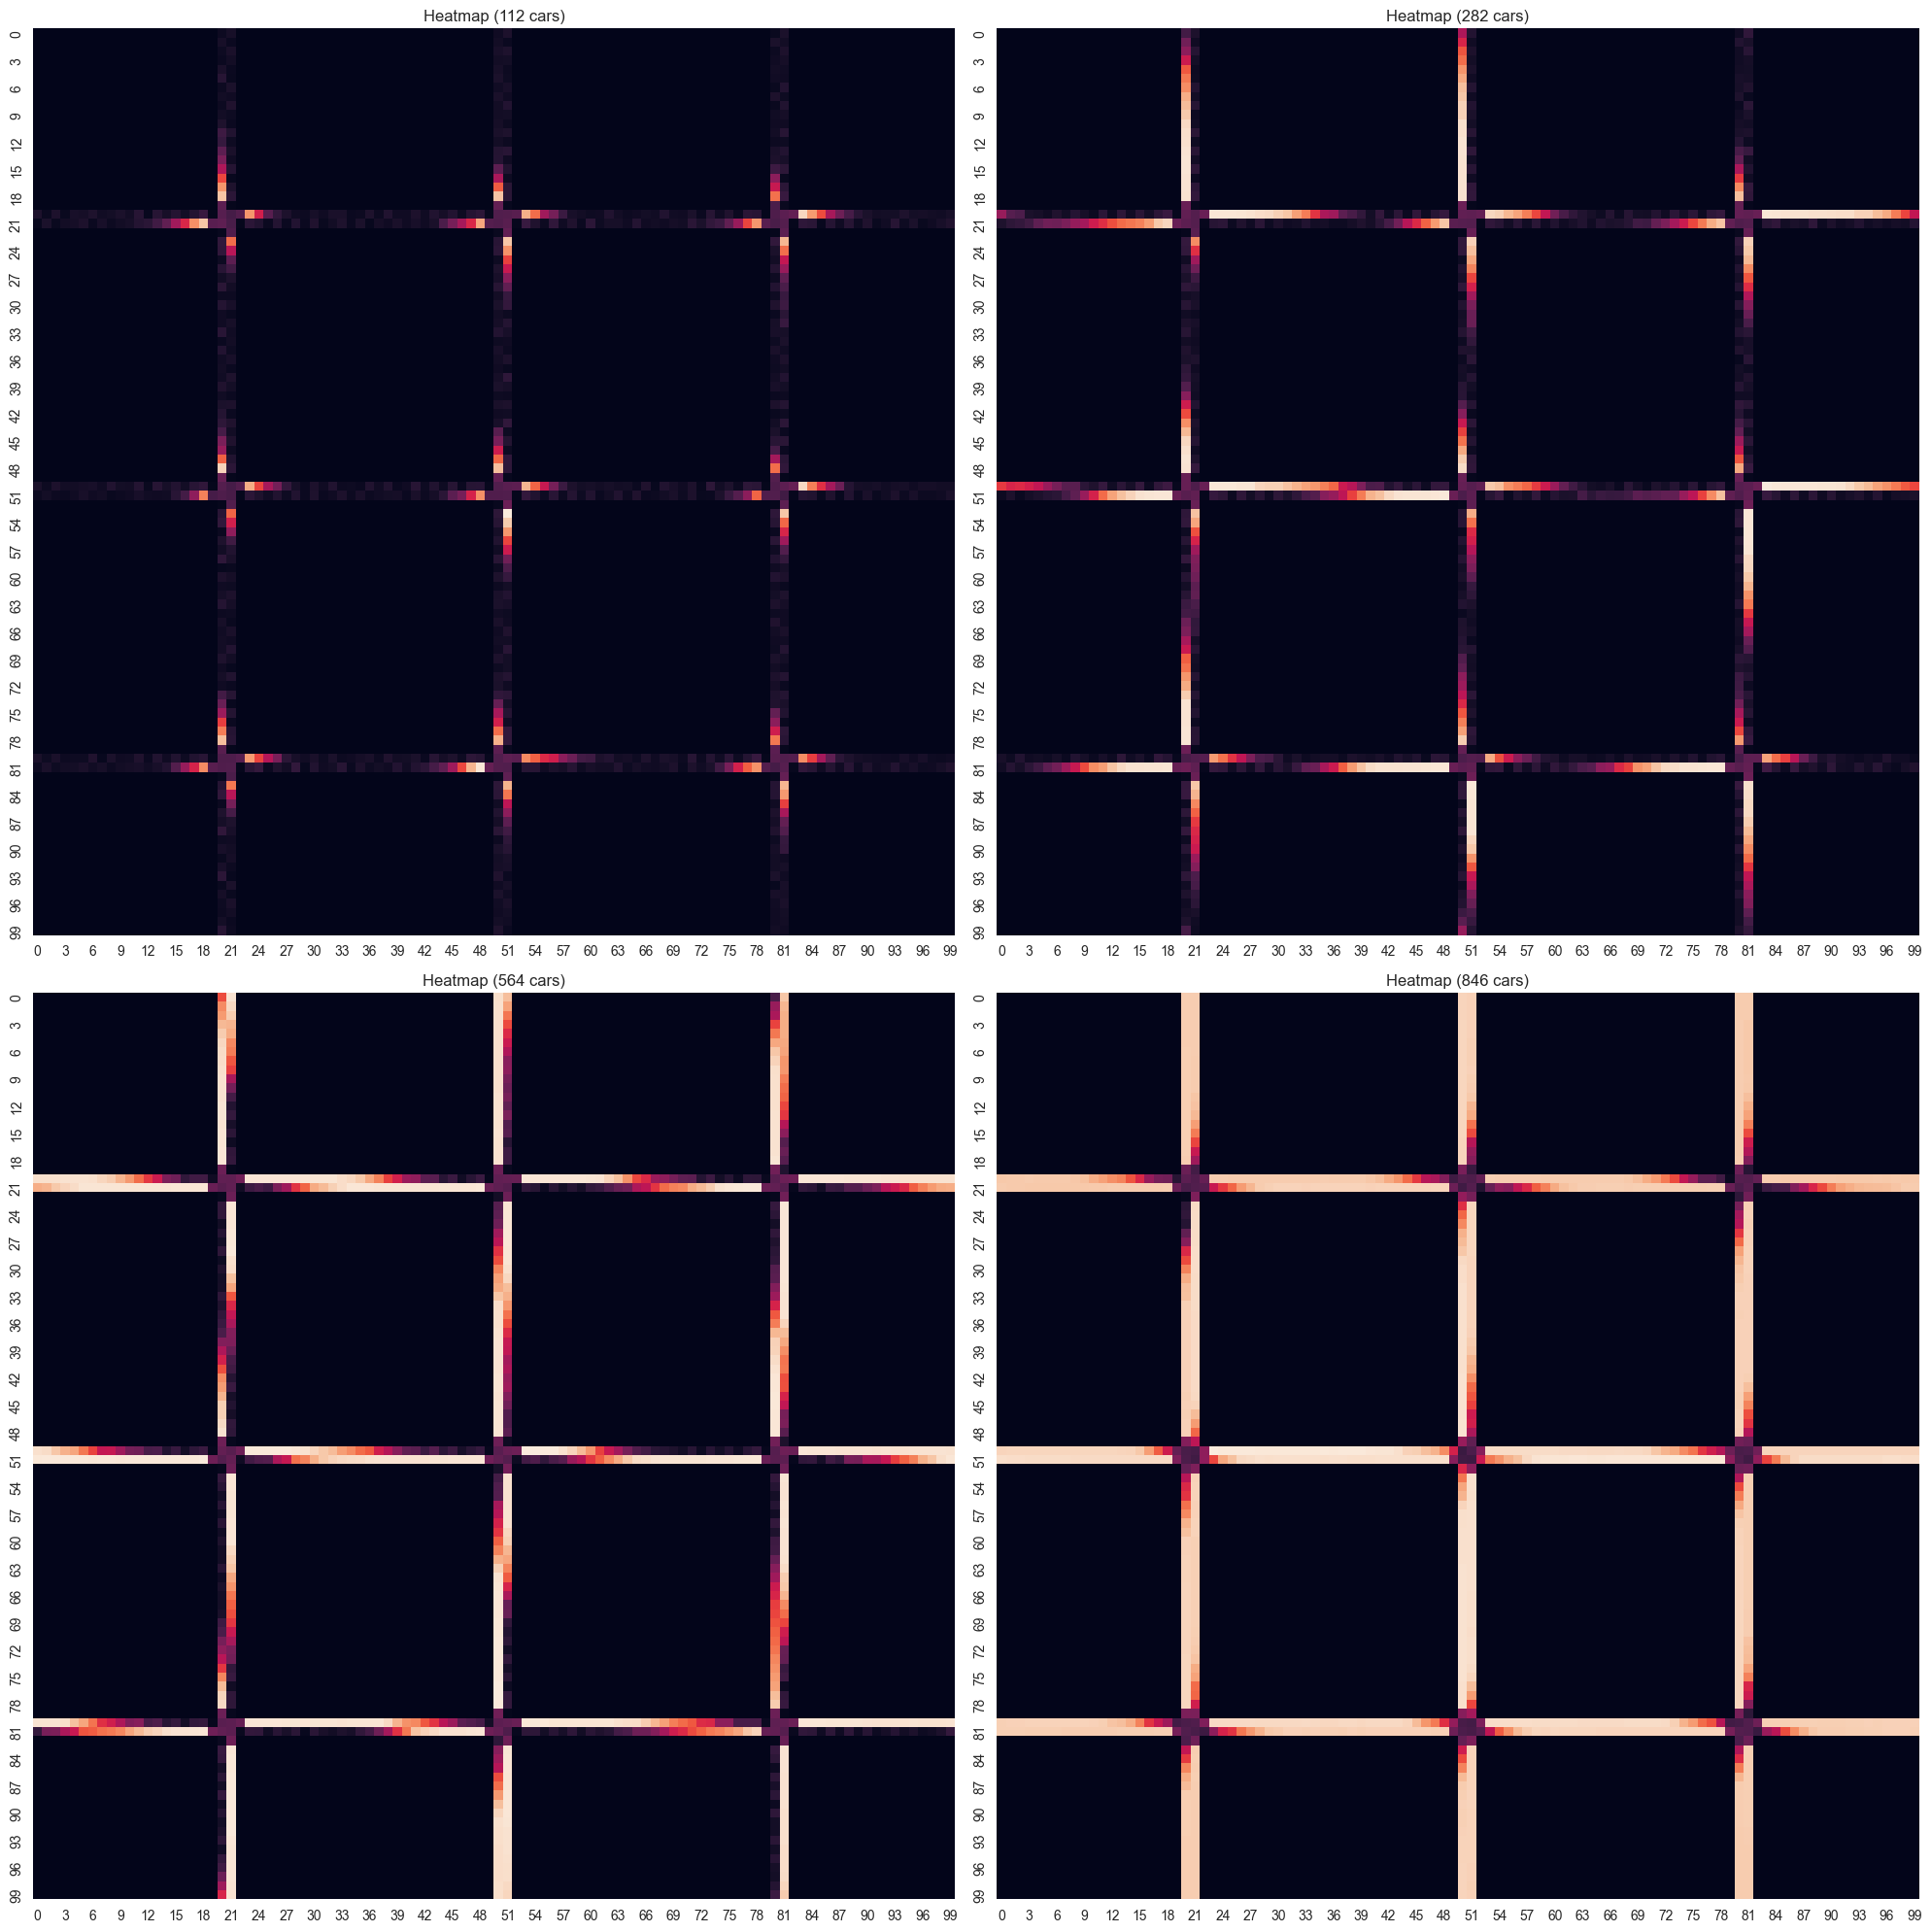

In [32]:
s.generate_heatmaps(heat_map_lists[8:12], cars_numbers)

## Average time to travel specified distances (lights time = 5)

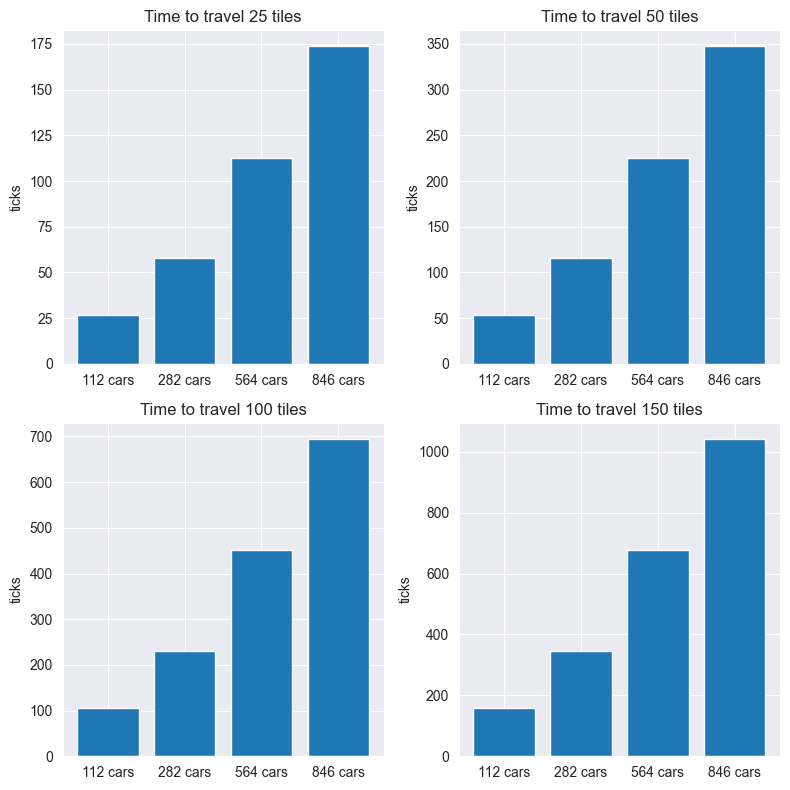

In [27]:
s.generate_travel_time_plots(average_section_travel_time_lists[0:4], cars_numbers, distances)

## Average time to travel specified distances (lights time = 10)

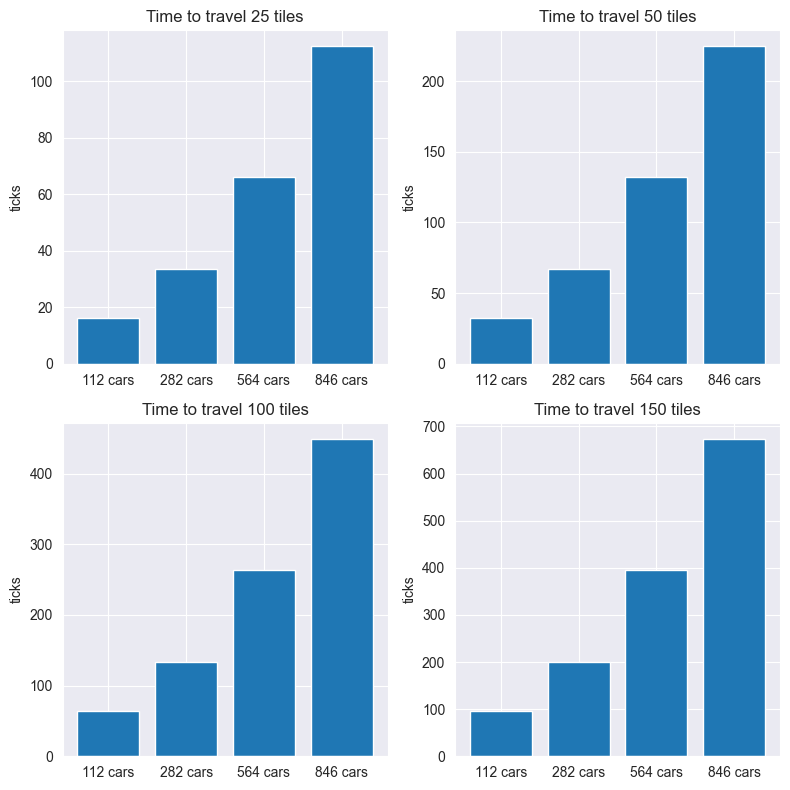

In [39]:
s.generate_travel_time_plots(average_section_travel_time_lists[4:8], cars_numbers, distances)

## Average time to travel specified distances (lights time = 15)

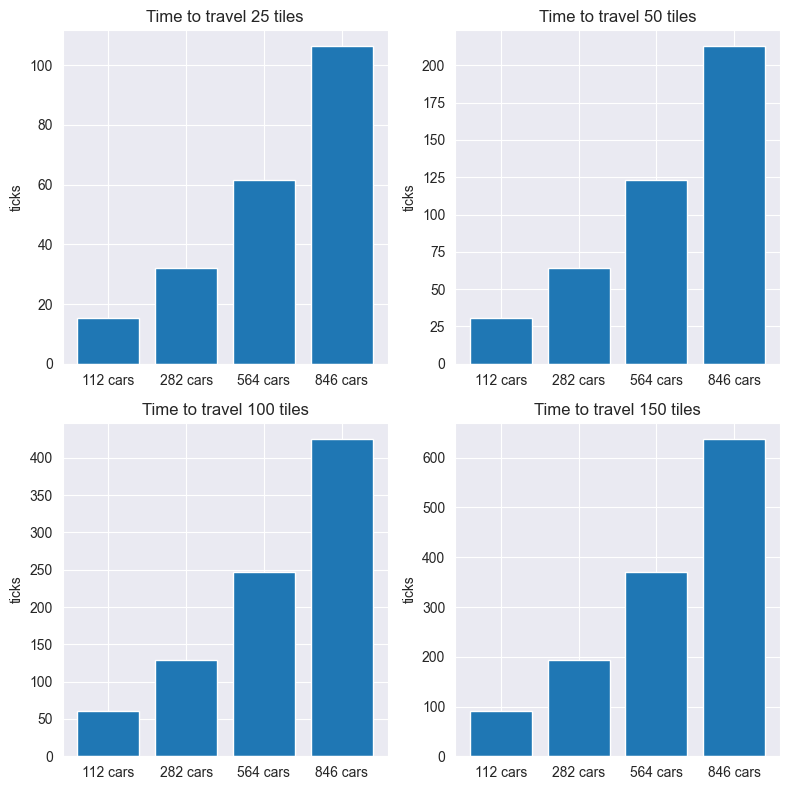

In [29]:
s.generate_travel_time_plots(average_section_travel_time_lists[8:12], cars_numbers, distances)

## TESTING CODE

## Mean velocity 200 cars

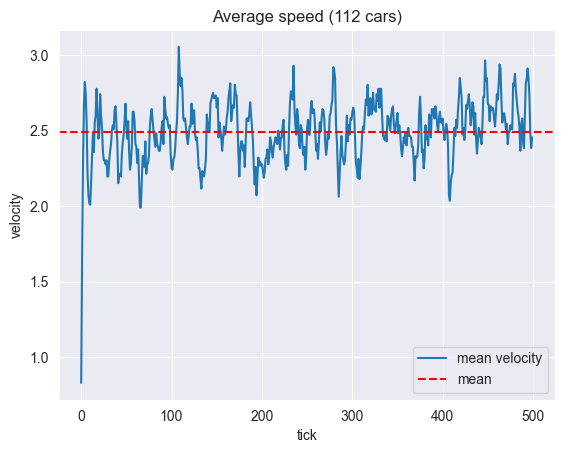

In [261]:
s.average_speed_plot(mean_vs_lists[0], cars_numbers[0])

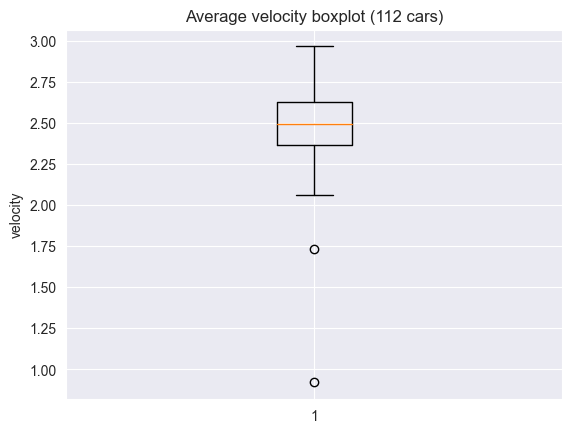

In [111]:
s.average_speed_box_plot(mean_vs_lists[0], cars_numbers[0])

## Stop cars ratio

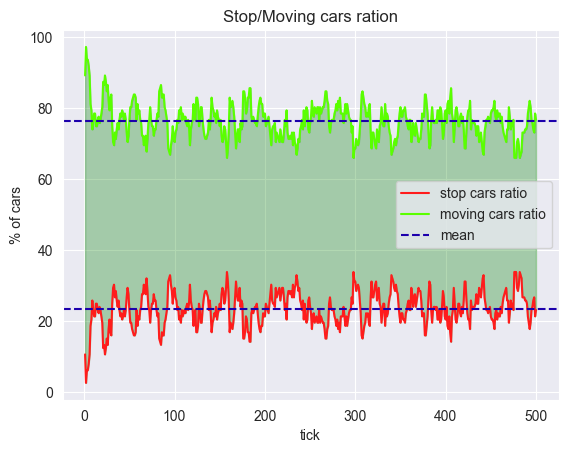

In [112]:
s.stop_moving_cars_plot(stop_cars_lists[0], moving_cars_list[0], TICKS)

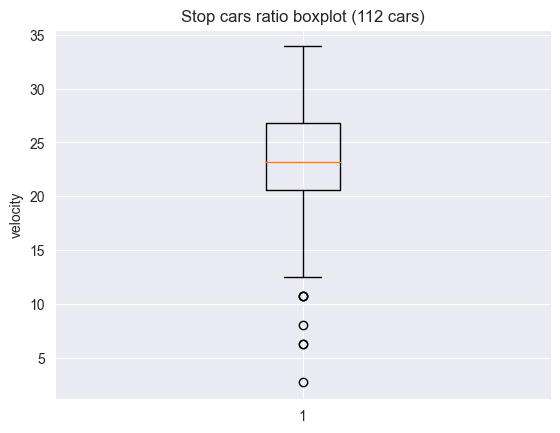

In [116]:
s.stop_cars_box_plot(stop_cars_lists[0], cars_numbers[0])

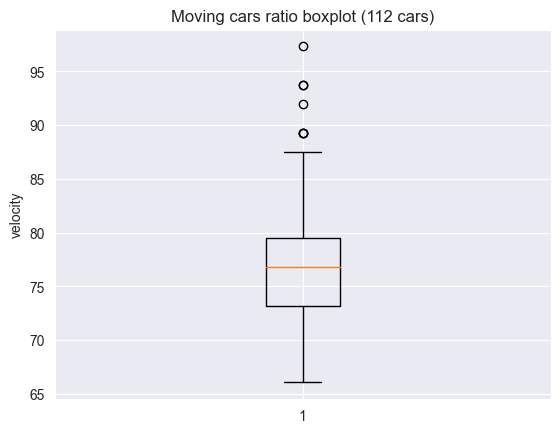

In [117]:
s.moving_cars_box_plot(moving_cars_list[0], cars_numbers[0])

In [29]:
heat_map

array([[-50100, -50100, -50100, ..., -50100, -50100, -50100],
       [-50100, -50100, -50100, ..., -50100, -50100, -50100],
       [-50100, -50100, -50100, ..., -50100, -50100, -50100],
       ...,
       [-50100, -50100, -50100, ..., -50100, -50100, -50100],
       [-50100, -50100, -50100, ..., -50100, -50100, -50100],
       [-50100, -50100, -50100, ..., -50100, -50100, -50100]])

<Axes: >

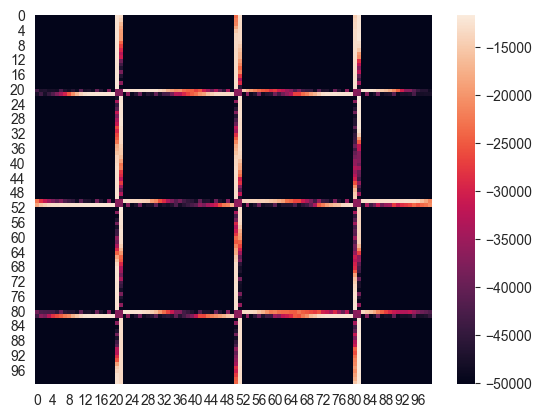

In [30]:
sns.heatmap(heat_map)

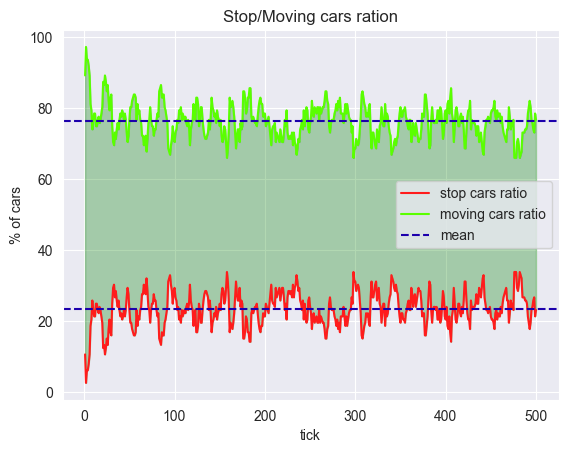

In [103]:
s.stop_moving_cars_plot(stop_cars_lists[0], moving_cars_list[0], TICKS)

In [55]:
map = Map(100)
simulation = Simulation(v_max=6, map=map, cars_number=200, time=1)
engine = Engine(simulation, map)

mean_vs = []
stop_cars_number = []
stara_macierz = engine.map.car_v_map
heat_map = np.where(stara_macierz == -100, -2, np.where(stara_macierz == -99, -1, 0))
for i in range(500):
    engine.loop(time=1) # no need time here
    mean_vs.append(s.mean_v(engine.map.car_v_map, 200))
    stop_cars_number.append(s.cars_stop_ratio(engine.map.car_v_map, 200))
    if i > 0 :
        heat_map += (np.clip(engine.map.car_v_map, 0, None) > 0).astype(int)

<Axes: >

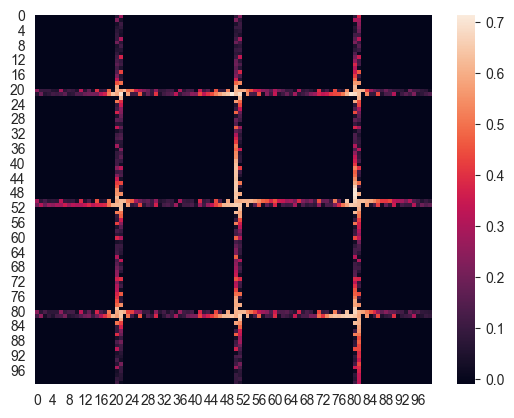

In [56]:
sns.heatmap(heat_map/200)